# Brain Tumor Object Detection<br>
Implementing a brain tumor detection system using YOLOv8. Curate a diverse dataset, annotate images, and train models for accurate detection. Emphasizing ethical healthcare data usage, this project seeks robust precision and recall in identifying brain tumors through the YOLOv8 along with different sizes and optimizers.

## **Data Collection**

[Dataset](https://www.kaggle.com/datasets/ammarahmed310/labeled-mri-brain-tumor-dataset)<br>
A comprehensive dataset consisting of brain scans from multiple imaging modalities, including MRI, has been chosen for the training of the YOLOv8 model. The dataset has been carefully selected to provide exposure to a wide variety of clinical situations, including cases of pituitary, meningioma, glioma, and no tumor. The dataset was obtained from Kagle. The specifications of the dataset, consisting of 1594 healthy brain samples, 1321 glioma, 1339 meningioma, and 1457 pituitary brain tumor samples.

## Importing Libraries

In [ ]:
!nvidia-smi

Sat Feb 22 15:40:50 2025       
+-----------------------------------------------------------------------------------------+
| NVIDIA-SMI 550.54.15              Driver Version: 550.54.15      CUDA Version: 12.4     |
|-----------------------------------------+------------------------+----------------------+
| GPU  Name                 Persistence-M | Bus-Id          Disp.A | Volatile Uncorr. ECC |
| Fan  Temp   Perf          Pwr:Usage/Cap |           Memory-Usage | GPU-Util  Compute M. |
|                                         |                        |               MIG M. |
|=========================================+========================+======================|
|   0  Tesla T4                       Off |   00000000:00:04.0 Off |                    0 |
| N/A   37C    P8              9W /   70W |       0MiB /  15360MiB |      0%      Default |
|                                         |                        |                  N/A |
+-----------------------------------------+-----

In [ ]:
!pip install Augmentor
!pip install ultralytics

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 921.5/921.5 kB 26.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 363.4/363.4 MB 4.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 13.8/13.8 MB 64.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 24.6/24.6 MB 66.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 883.7/883.7 kB 35.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 664.8/664.8 MB 2.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 211.5/211.5 MB 5.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 56.3/56.3 MB 12.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 127.9/127.9 MB 6.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 207.5/207.5 MB 6.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 21.1/21.1 MB 82.9 MB/s eta 0:00:00
  Attempting uninstall: nvidia-nvjitlink-cu12
    Found existing installation: nvidia-nvjitlink-cu12 12.5.82
    Uninstall

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import matplotlib.patches as patches
import cv2
import math
import os
import zipfile
import random
import shutil
import Augmentor
from sklearn.model_selection import train_test_split
from ultralytics import YOLO
from PIL import Image
from IPython.display import display

Creating new Ultralytics Settings v0.0.6 file ✅ 
View Ultralytics Settings with 'yolo settings' or at '/root/.config/Ultralytics/settings.json'
Update Settings with 'yolo settings key=value', i.e. 'yolo settings runs_dir=path/to/dir'. For help see https://docs.ultralytics.com/quickstart/#ultralytics-settings.


In [ ]:
import os
HOME = os.getcwd()
print(HOME)

/content


In [ ]:
# Pip install method (recommended)

!pip install ultralytics==8.2.51

from IPython import display
display.clear_output()

import ultralytics
ultralytics.checks()

Ultralytics 8.3.78 🚀 Python-3.11.11 torch-2.5.1+cu124 CUDA:0 (Tesla T4, 15095MiB)
Setup complete ✅ (2 CPUs, 12.7 GB RAM, 33.2/112.6 GB disk)


In [ ]:
from ultralytics import YOLO

from IPython.display import display, Image


In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
%cd /content/drive/MyDrive/brain_tumor_object_detection


/content/drive/MyDrive/brain_tumor_object_detection


In [ ]:
!ls

brain_tumor_object_detection.ipynb  dataset  data.yaml


In [ ]:
import roboflow as rf
import matplotlib.pyplot as plt

In [ ]:
%cd /content/drive/MyDrive/brain_tumor_object_detection

!yolo task=detect mode=train model=yolov8s.pt data= data.yaml epochs=10 imgsz=640 plots=True

/content/drive/MyDrive/brain_tumor_object_detection
/usr/local/lib/python3.11/dist-packages/ultralytics/nn/tasks.py:781: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of the loaded file. Please open an issue on GitHub for any issues related to this experimental feature.
  ckpt =

In [24]:
!ls runs/detect/train6

args.yaml					    PR_curve.png	   val_batch0_pred.jpg
confusion_matrix_normalized.png			    R_curve.png		   val_batch1_labels.jpg
confusion_matrix.png				    results.csv		   val_batch1_pred.jpg
events.out.tfevents.1740240741.9518664d3c06.9261.0  results.png		   val_batch2_labels.jpg
F1_curve.png					    train_batch0.jpg	   val_batch2_pred.jpg
labels_correlogram.jpg				    train_batch1.jpg	   weights
labels.jpg					    train_batch2.jpg
P_curve.png					    val_batch0_labels.jpg


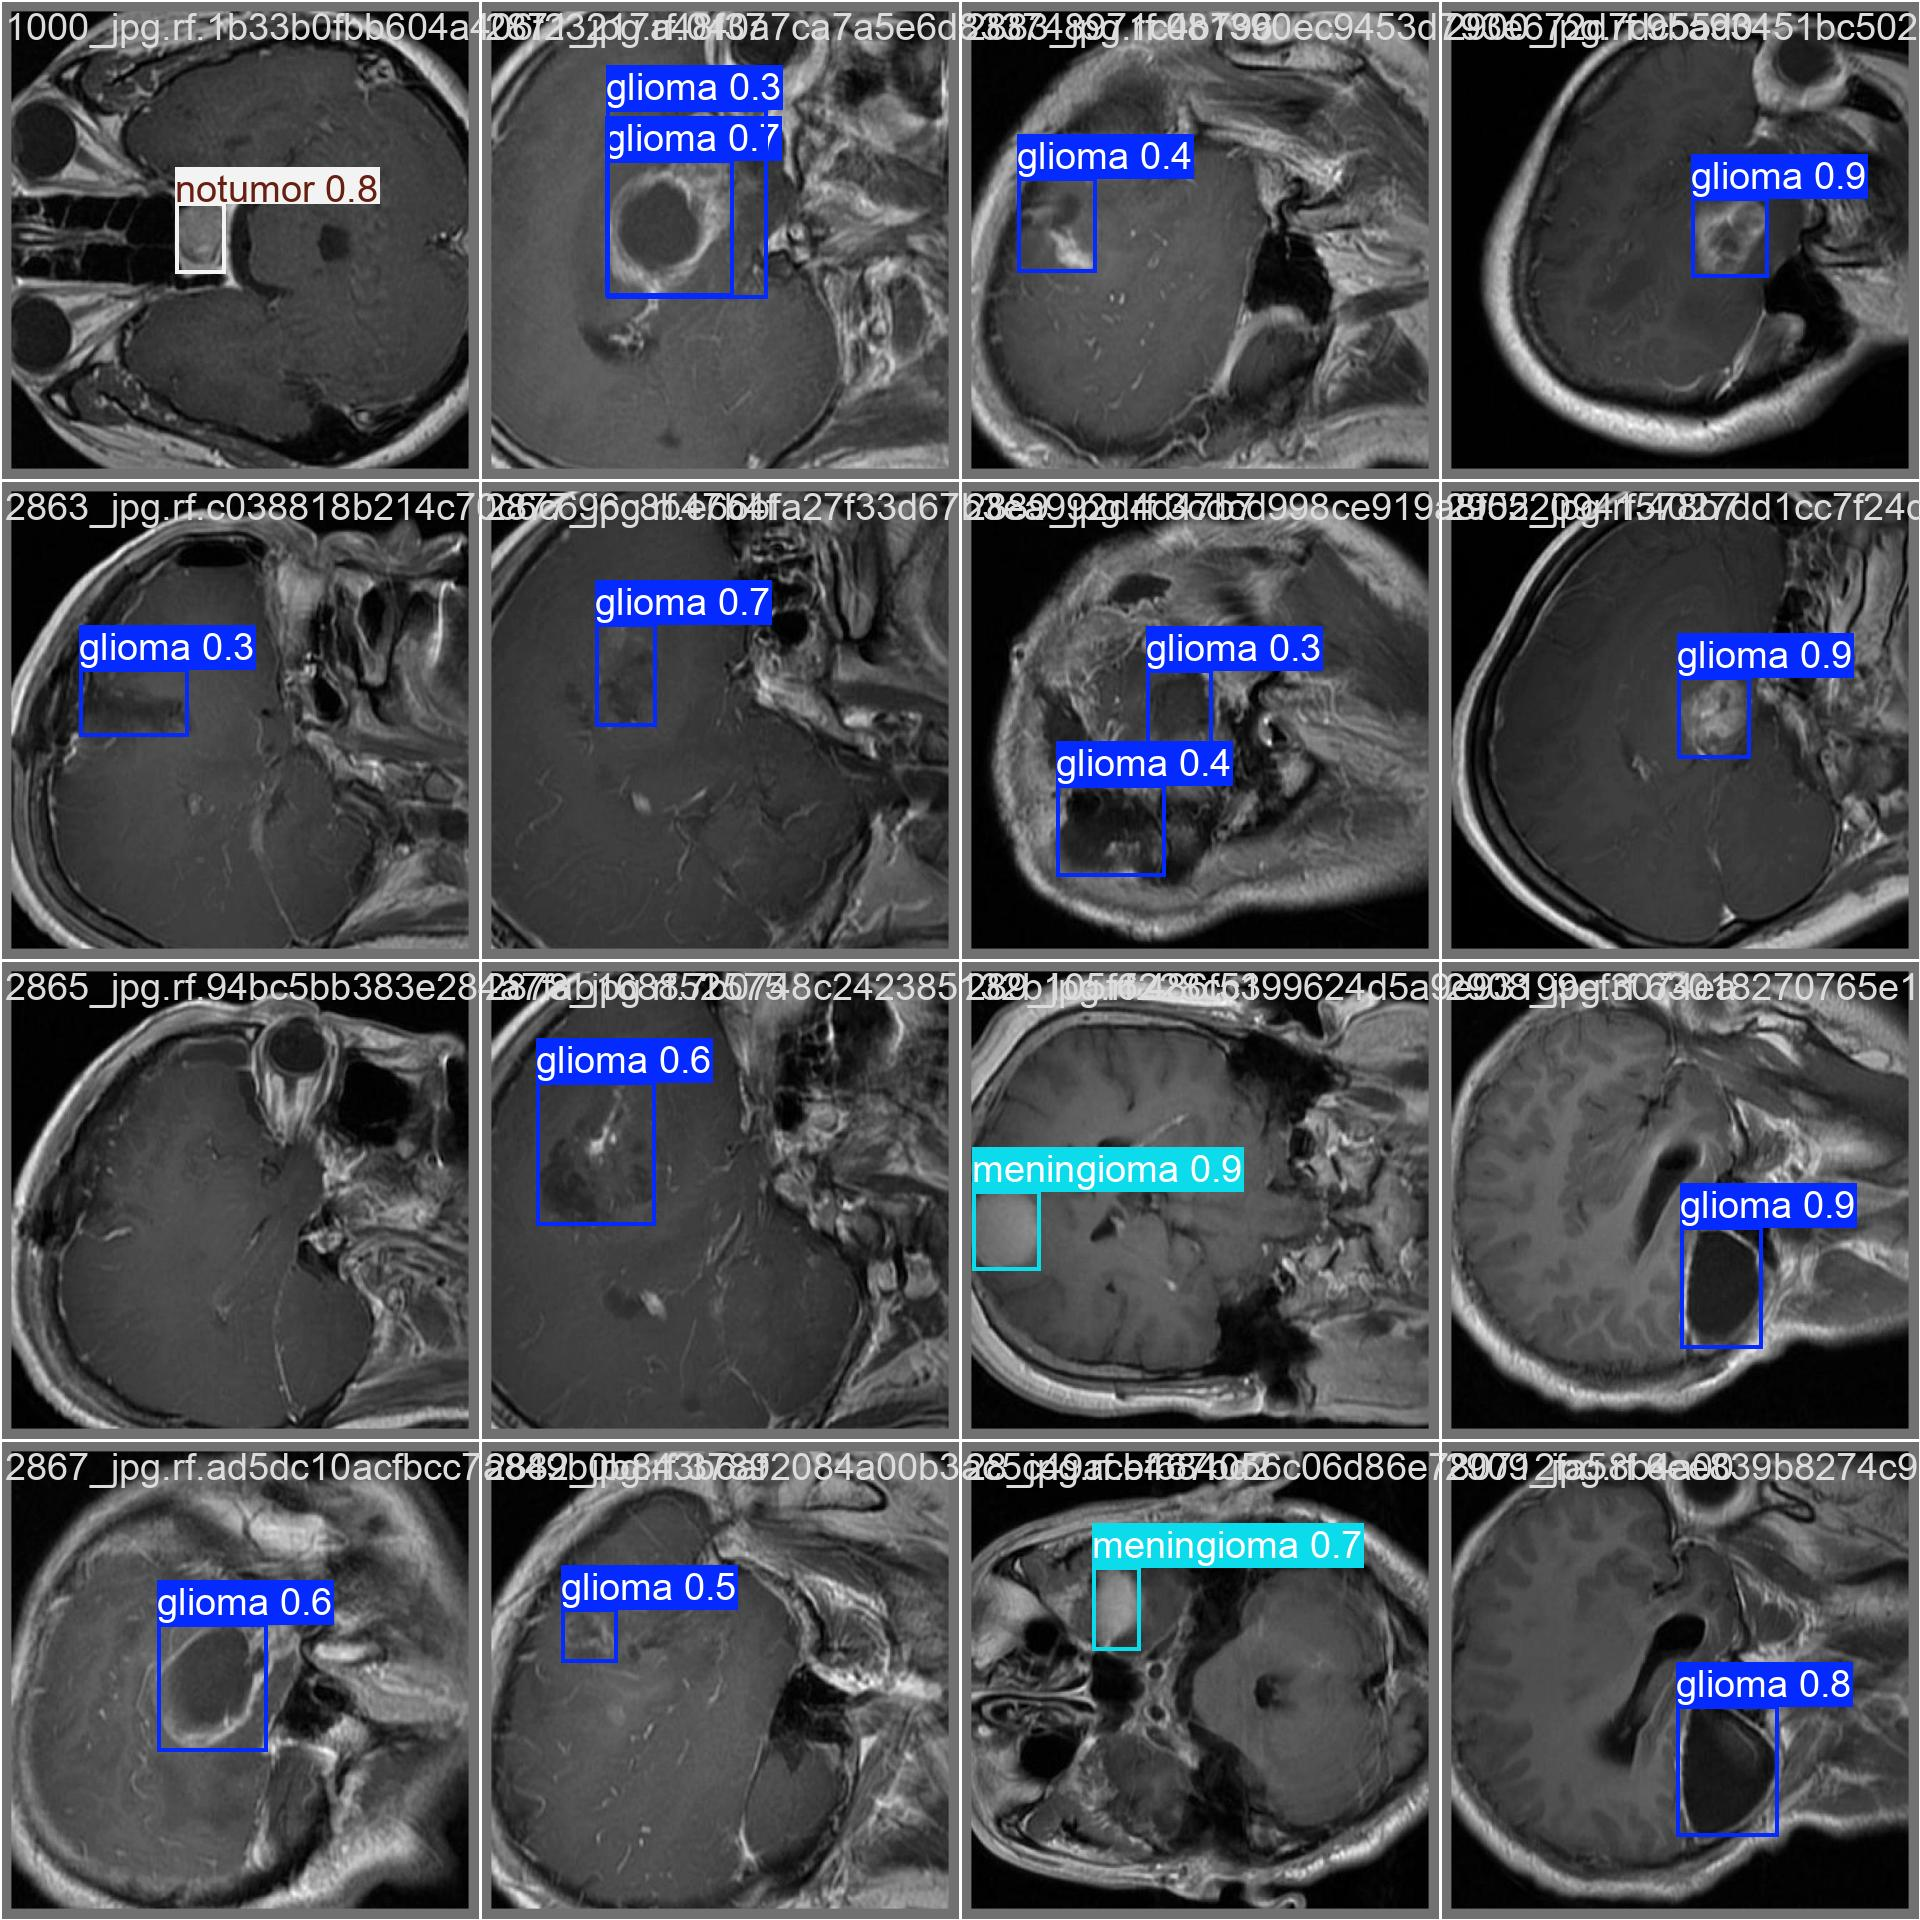

In [42]:
Image(filename='runs/detect/train6/val_batch0_pred.jpg', width=800)

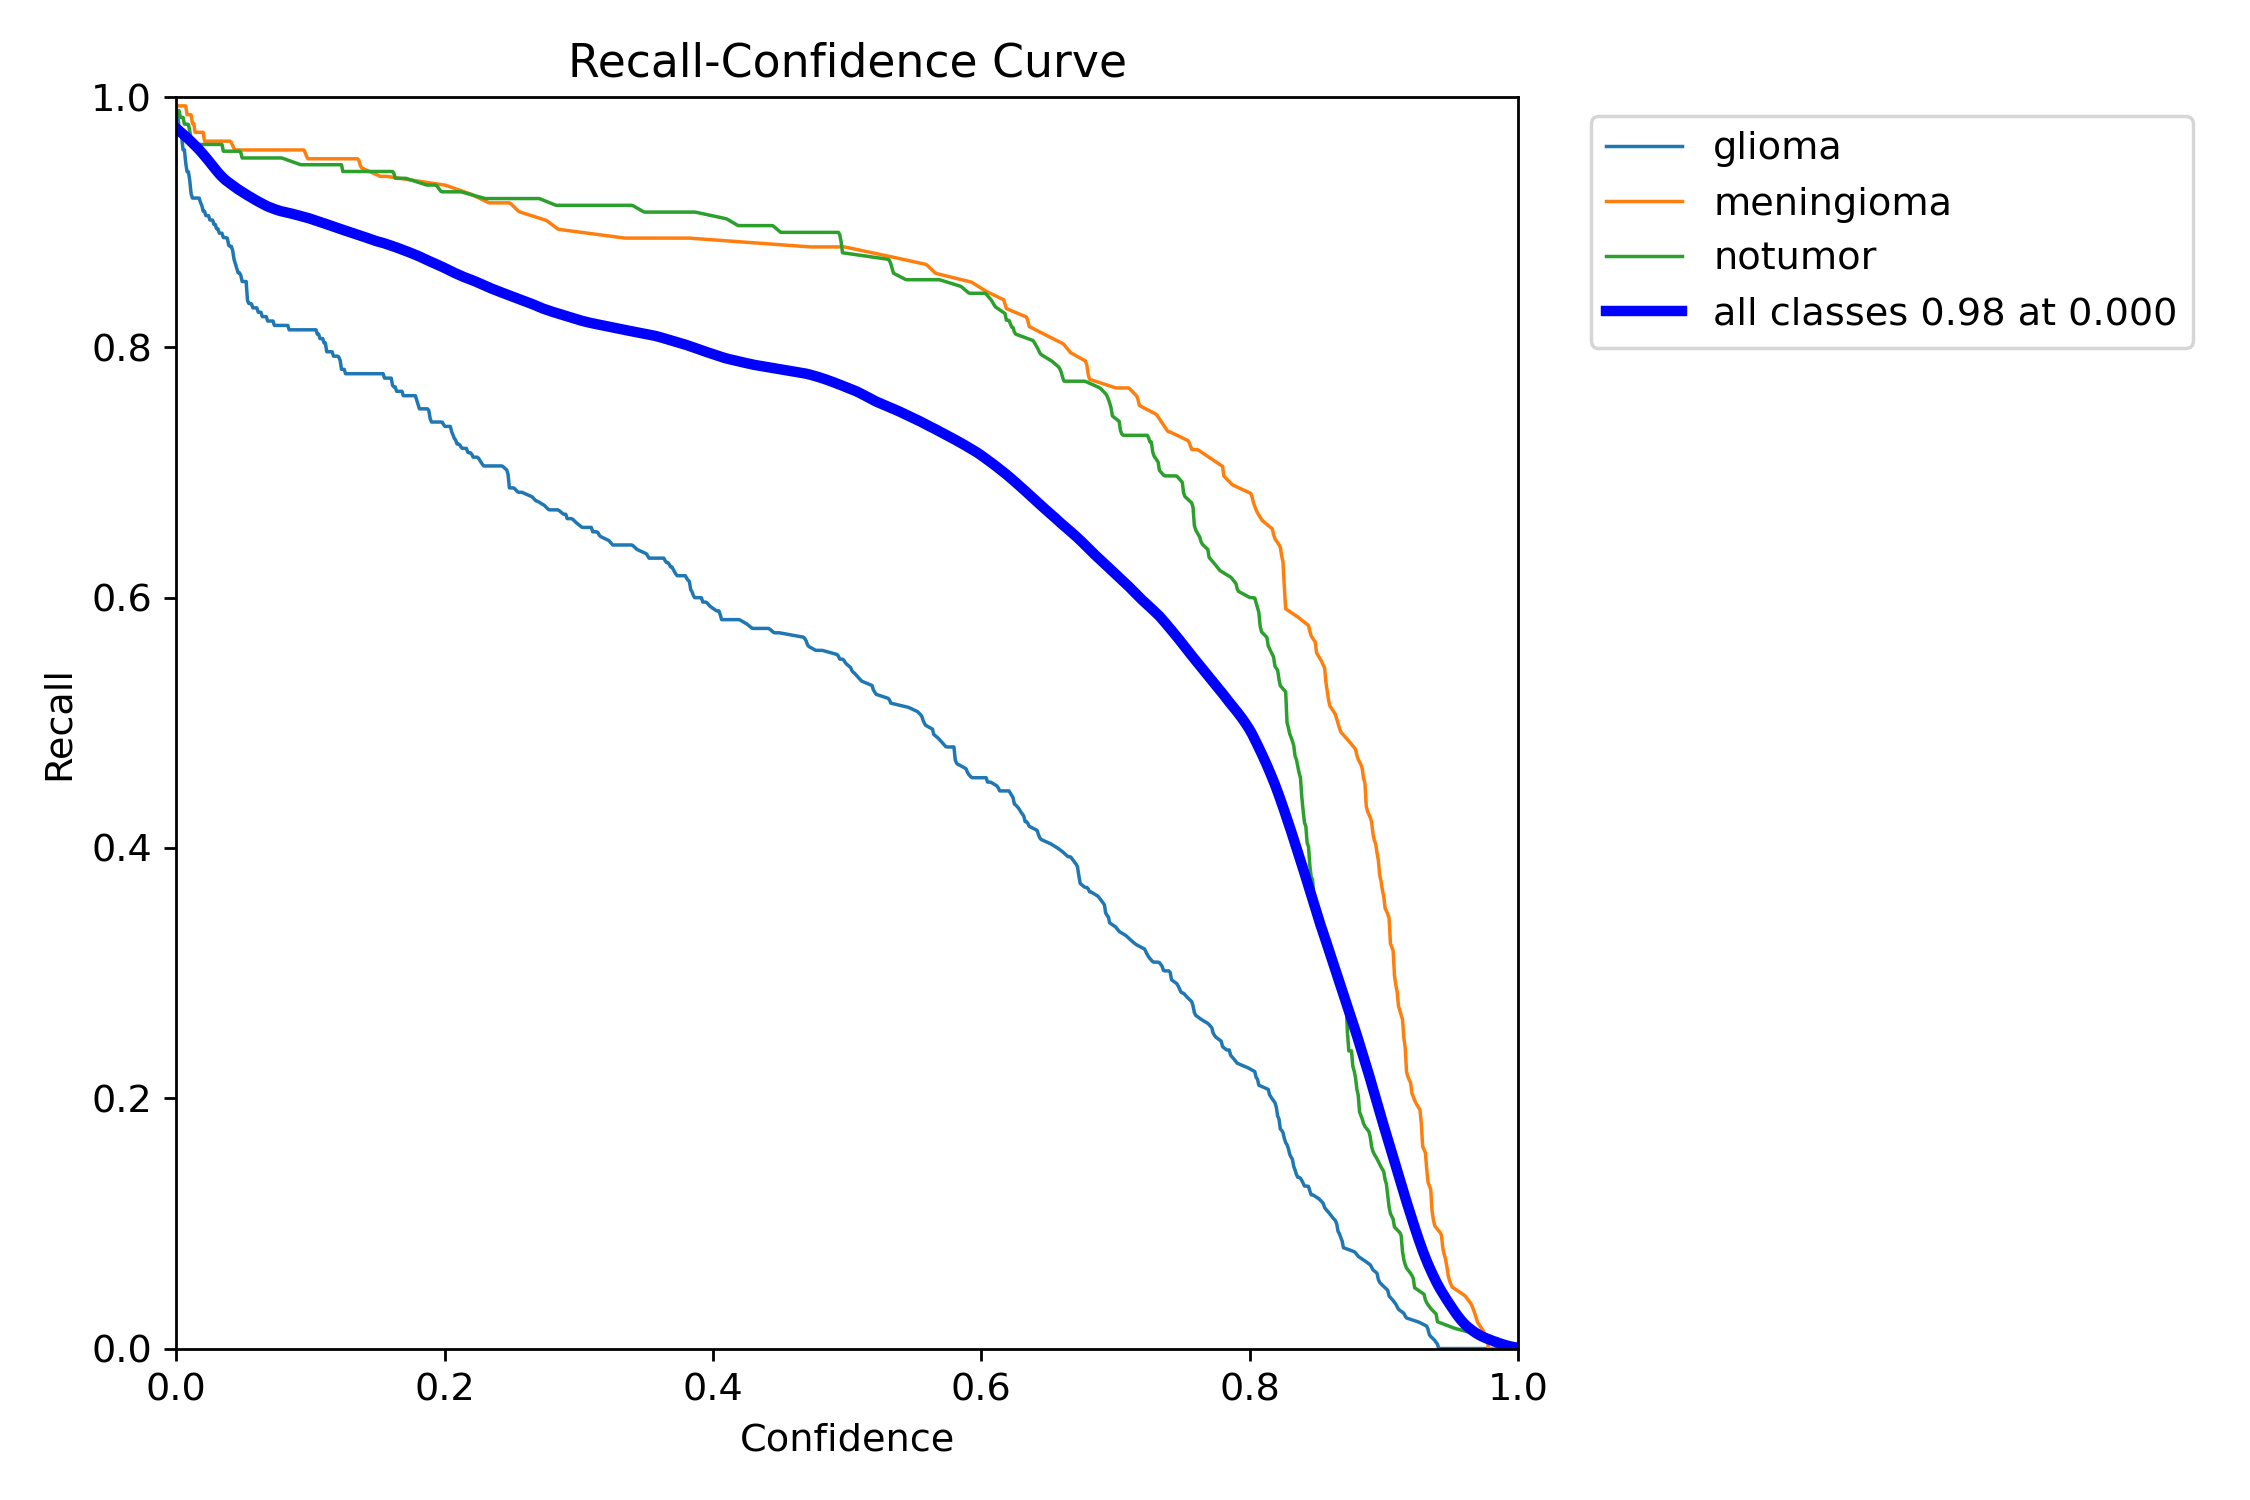

In [39]:
Image(filename='runs/detect/train6/R_curve.png', width=800)

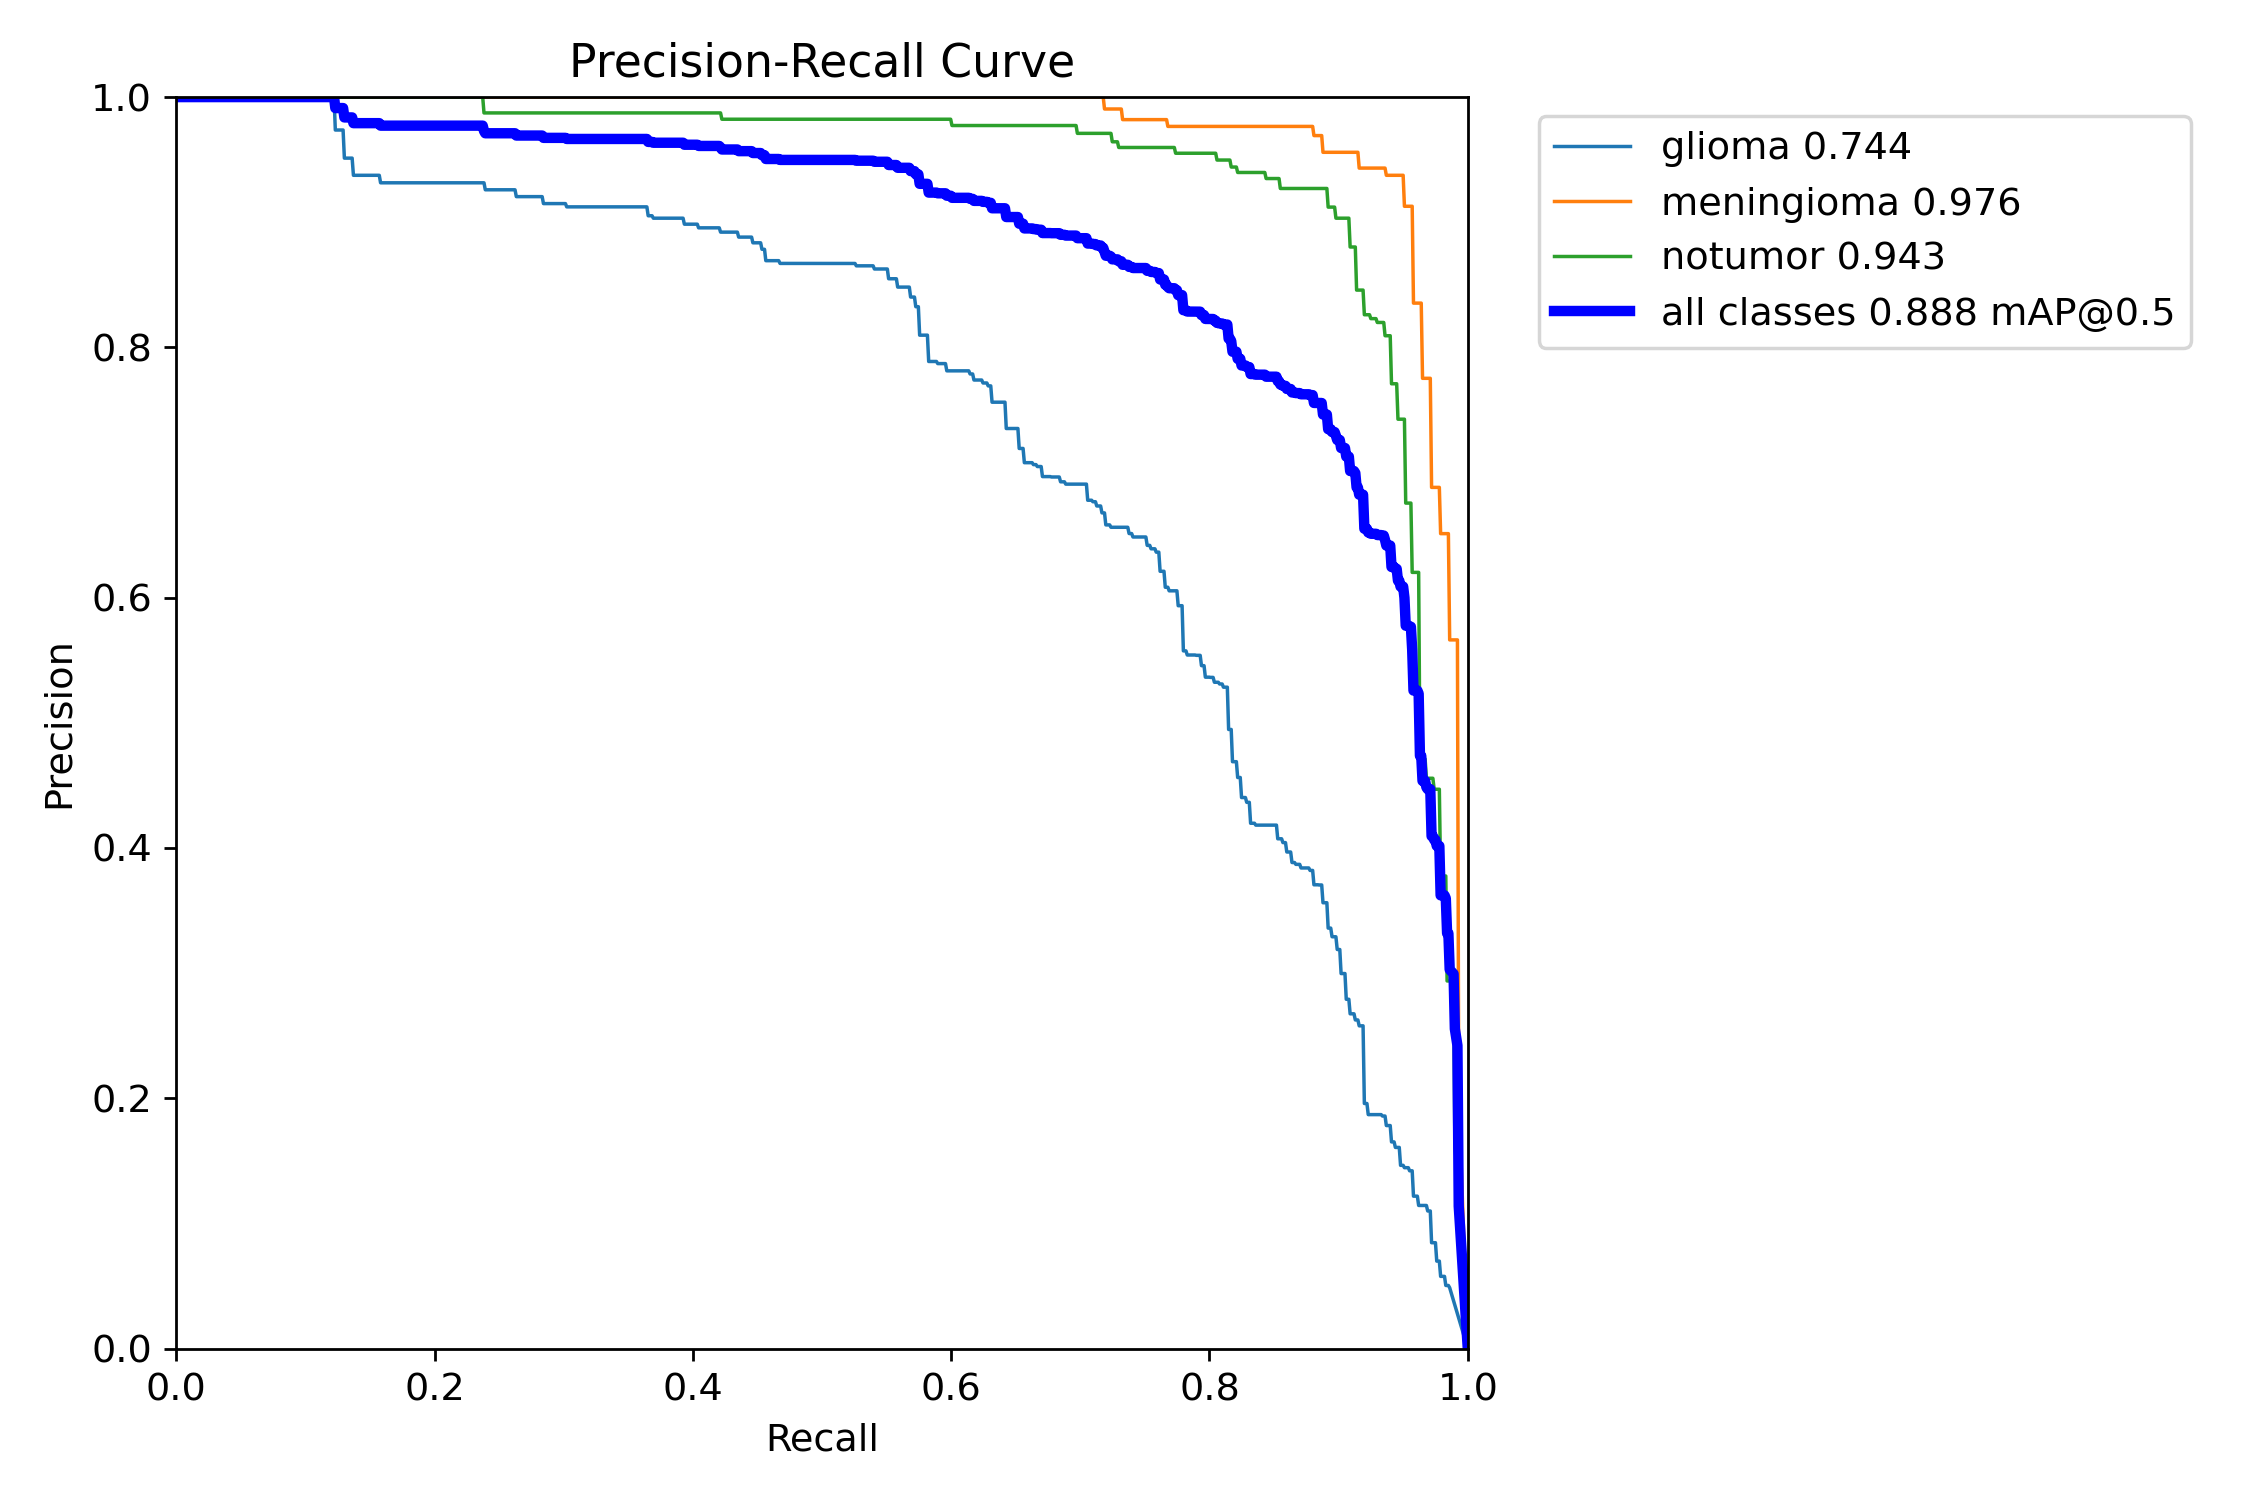

In [37]:
Image(filename='runs/detect/train6/PR_curve.png', width=800)

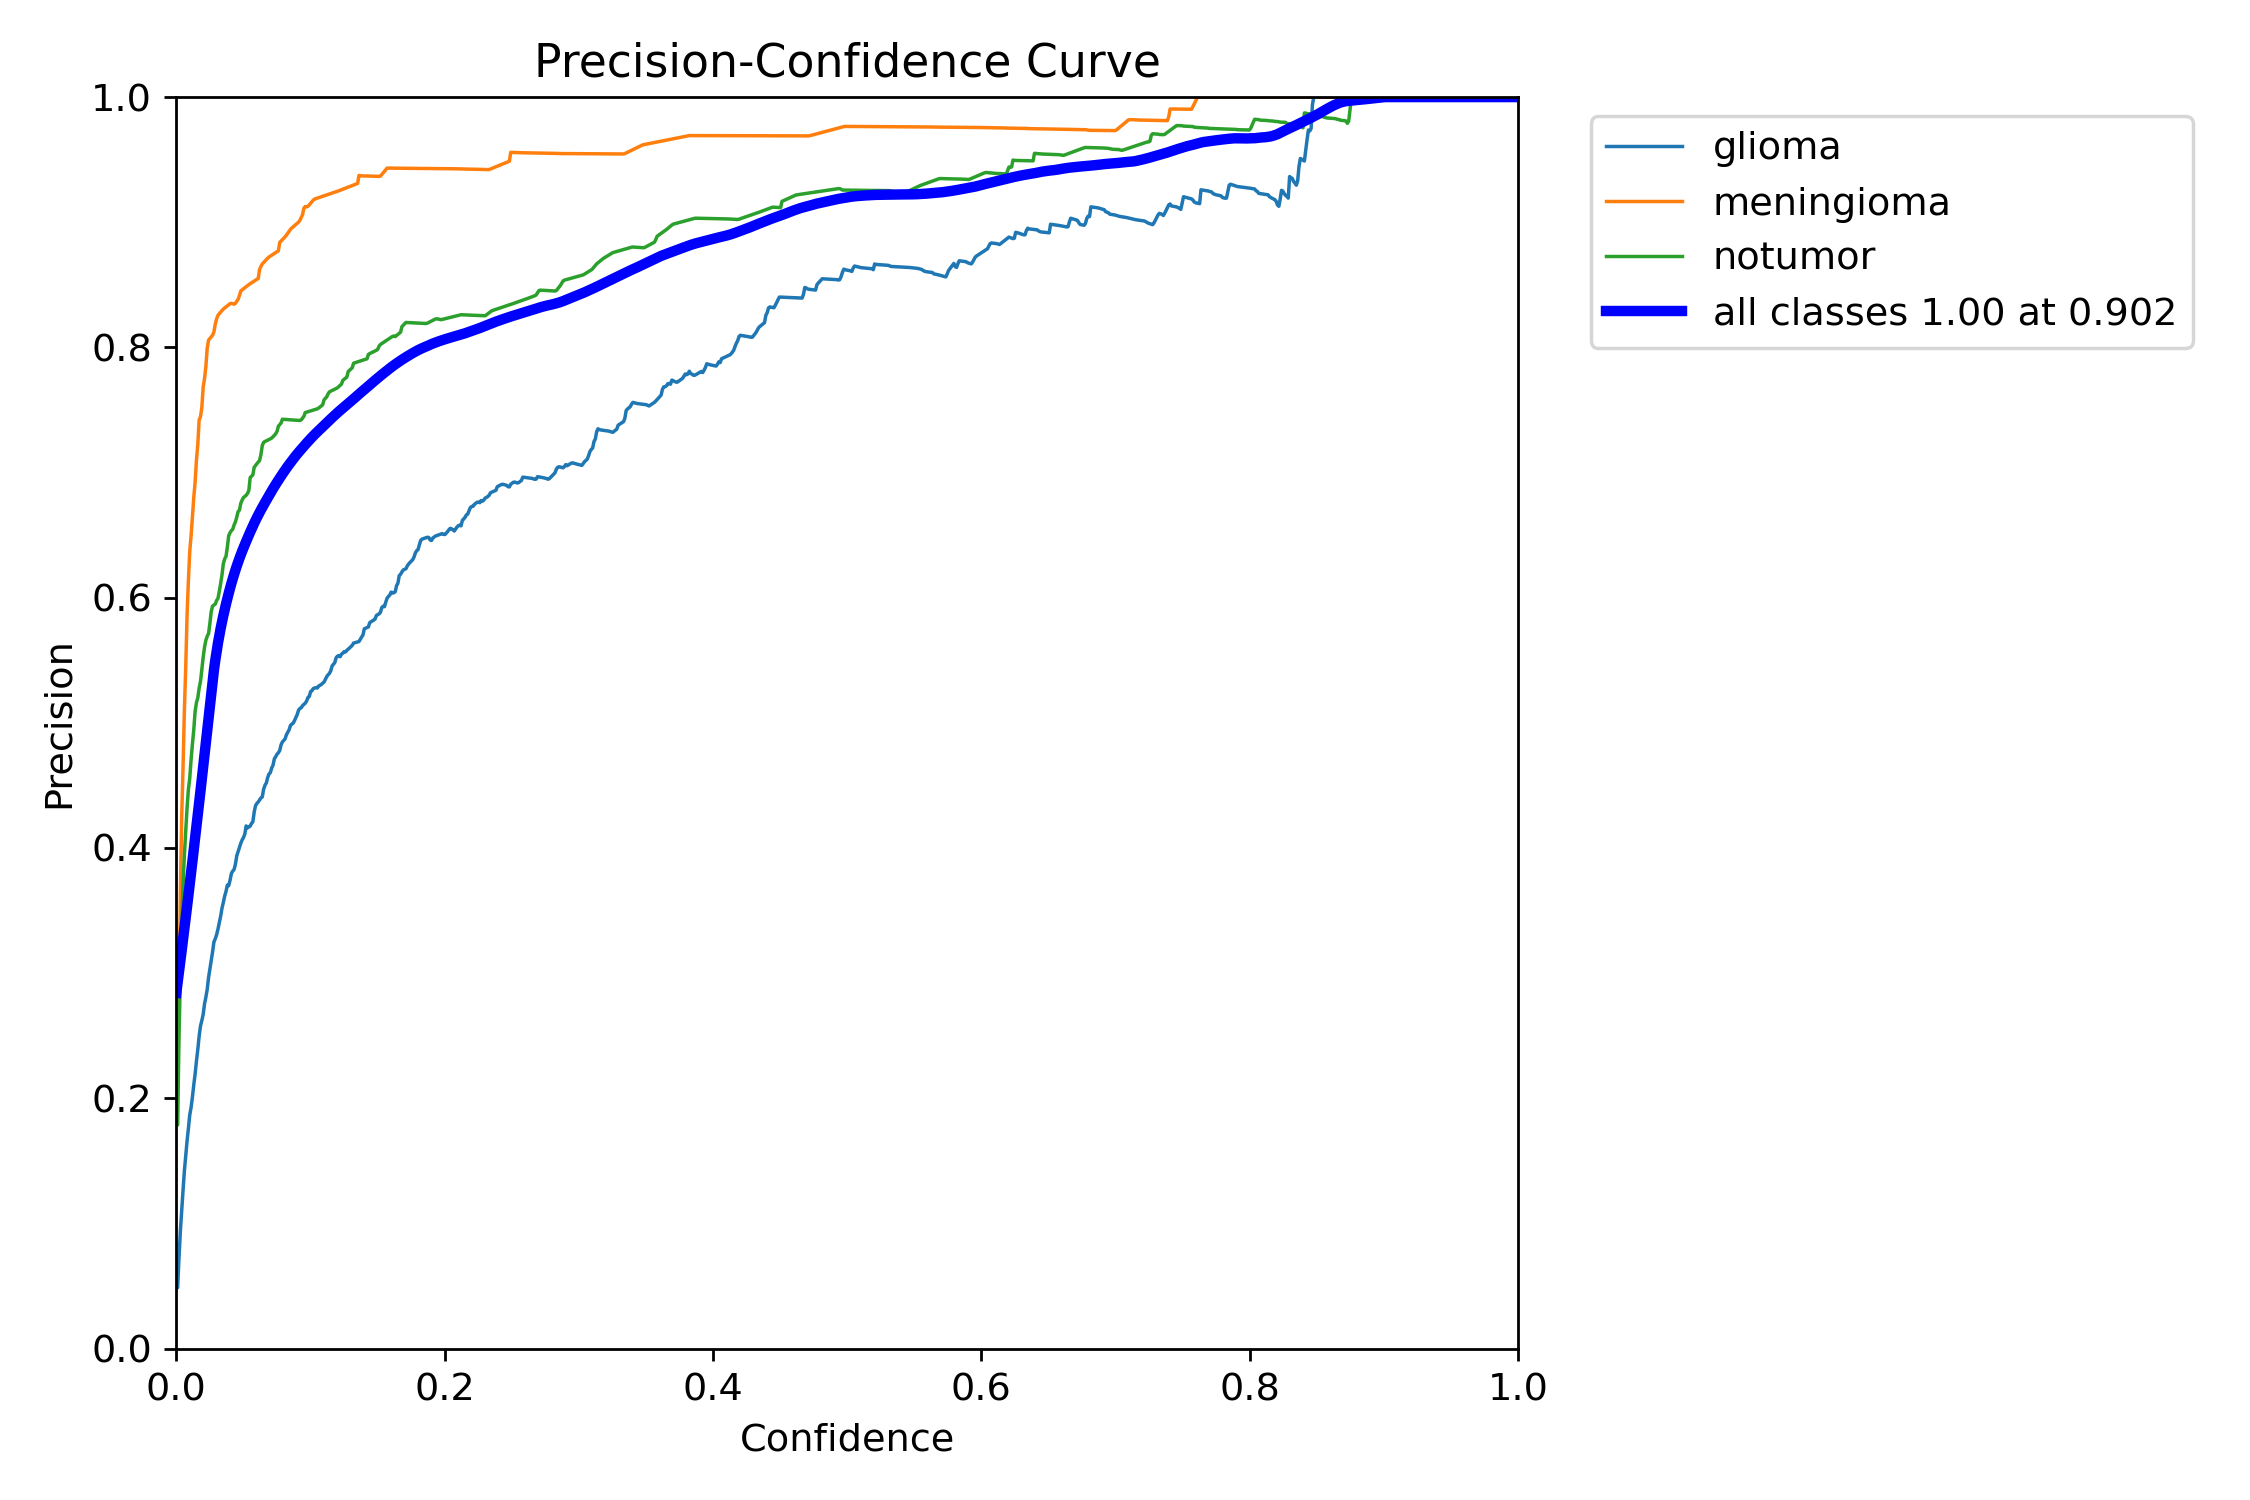

In [36]:
Image(filename='runs/detect/train6/P_curve.png', width=800)

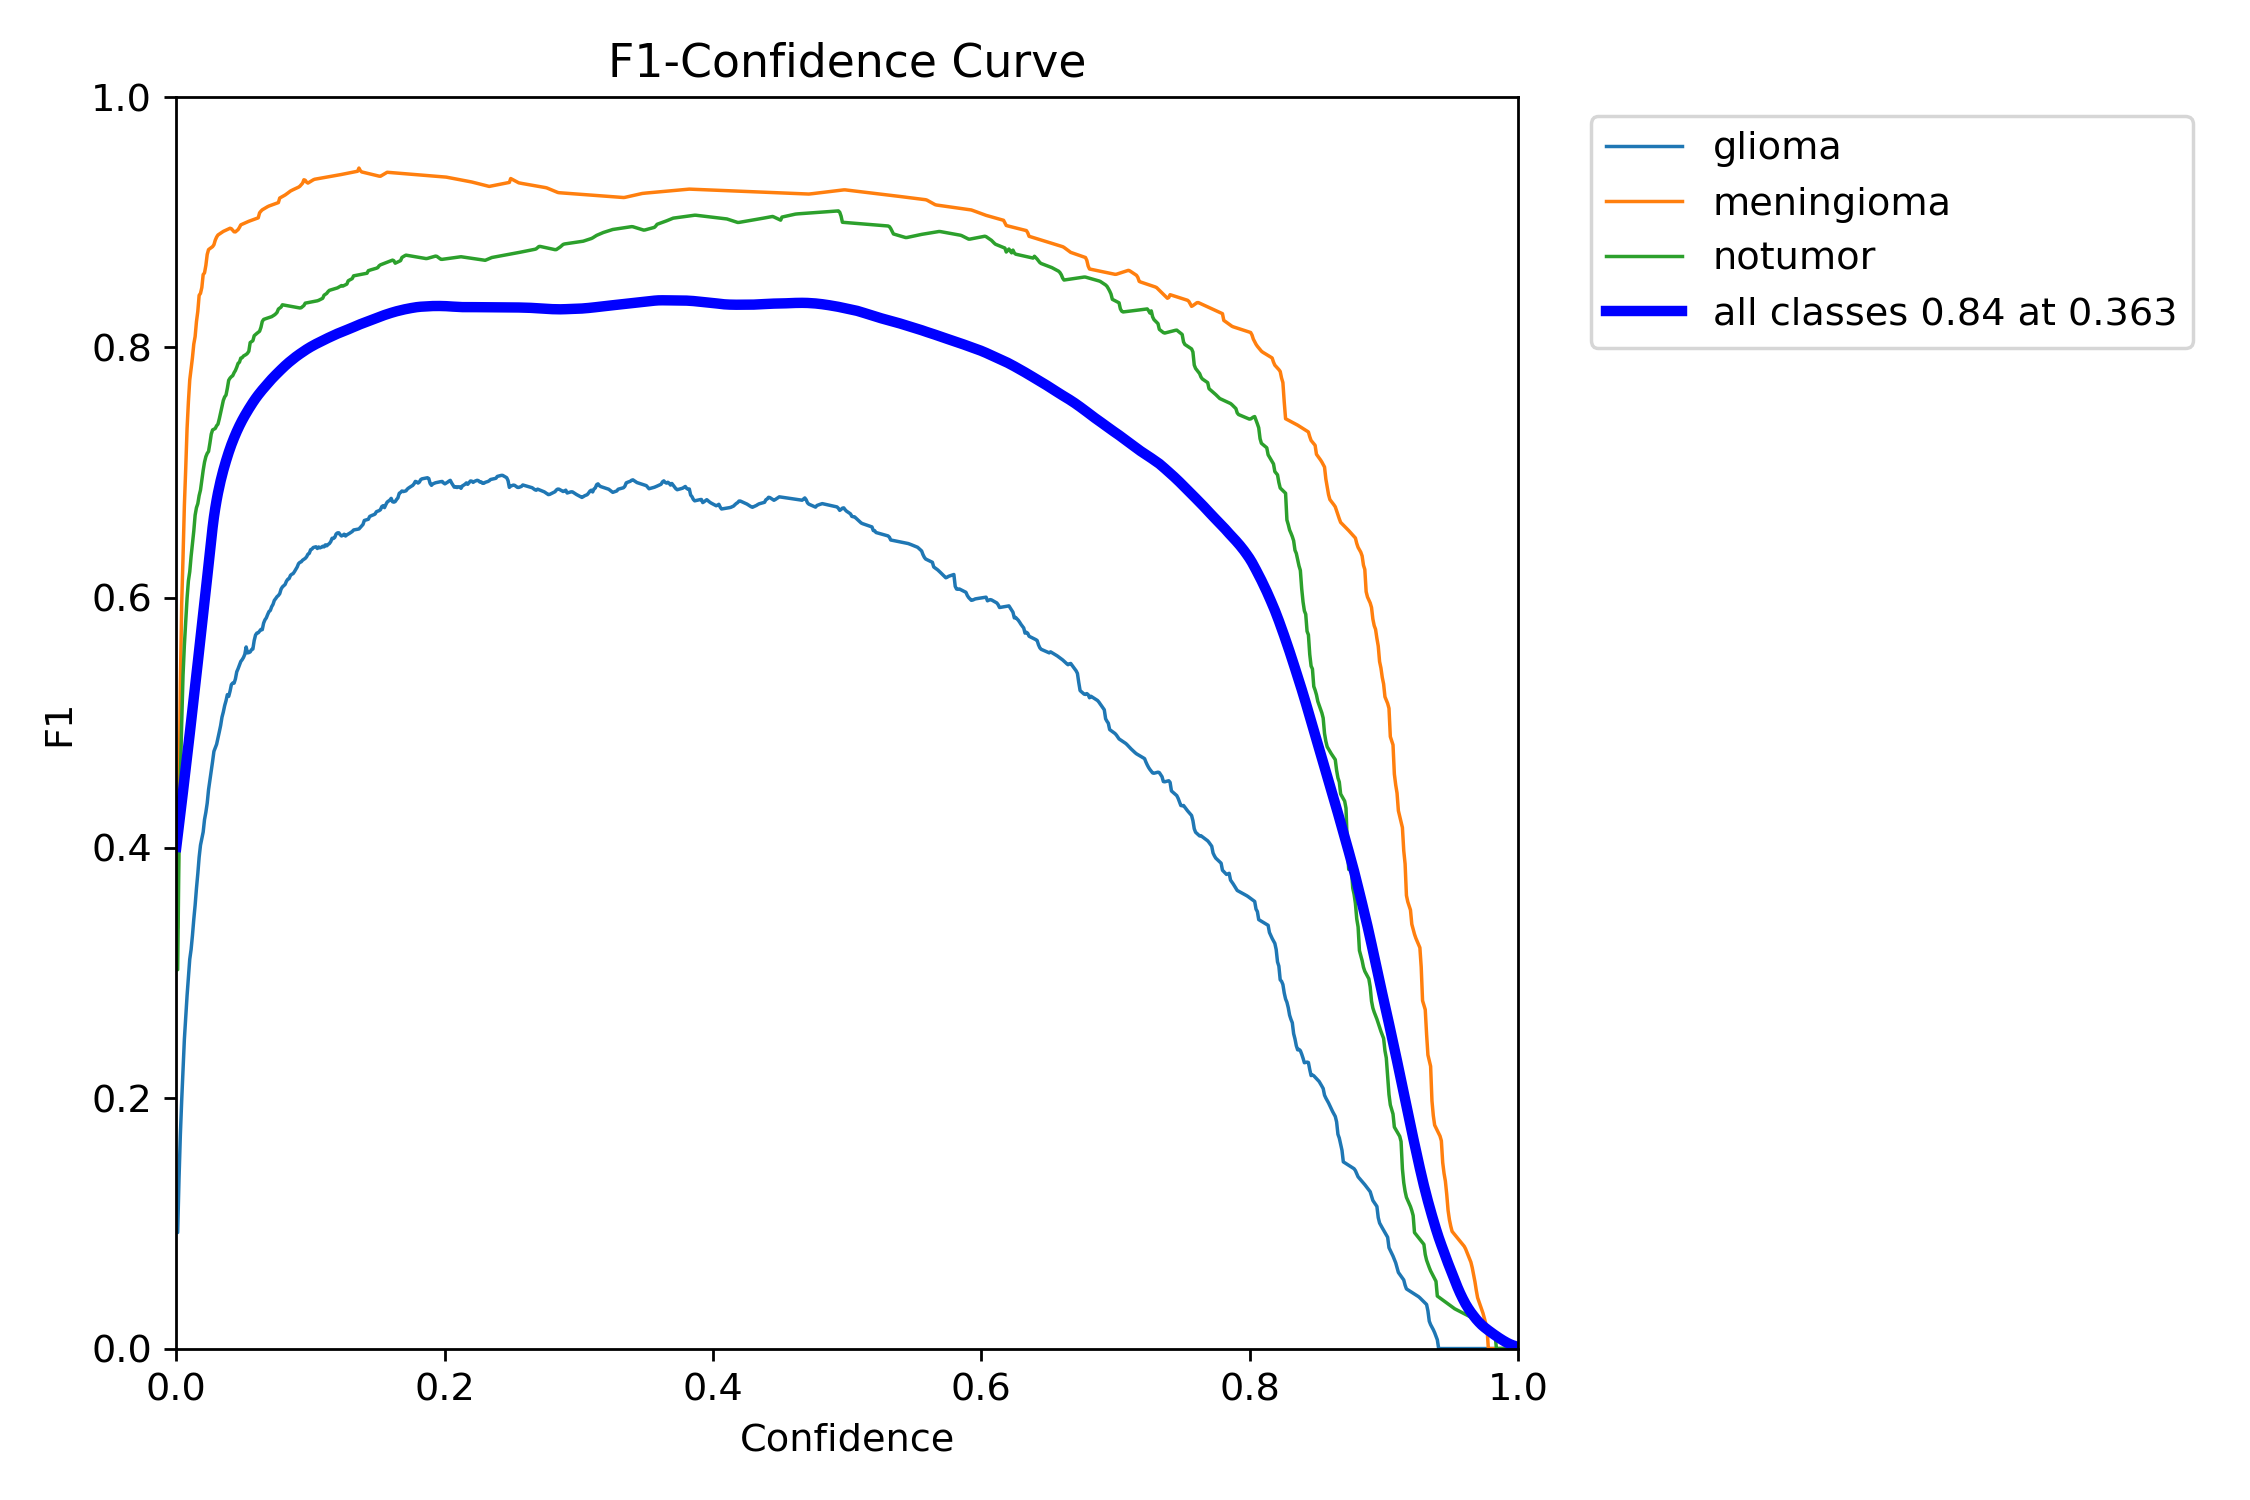

In [35]:
Image(filename='runs/detect/train6/F1_curve.png', width=800)

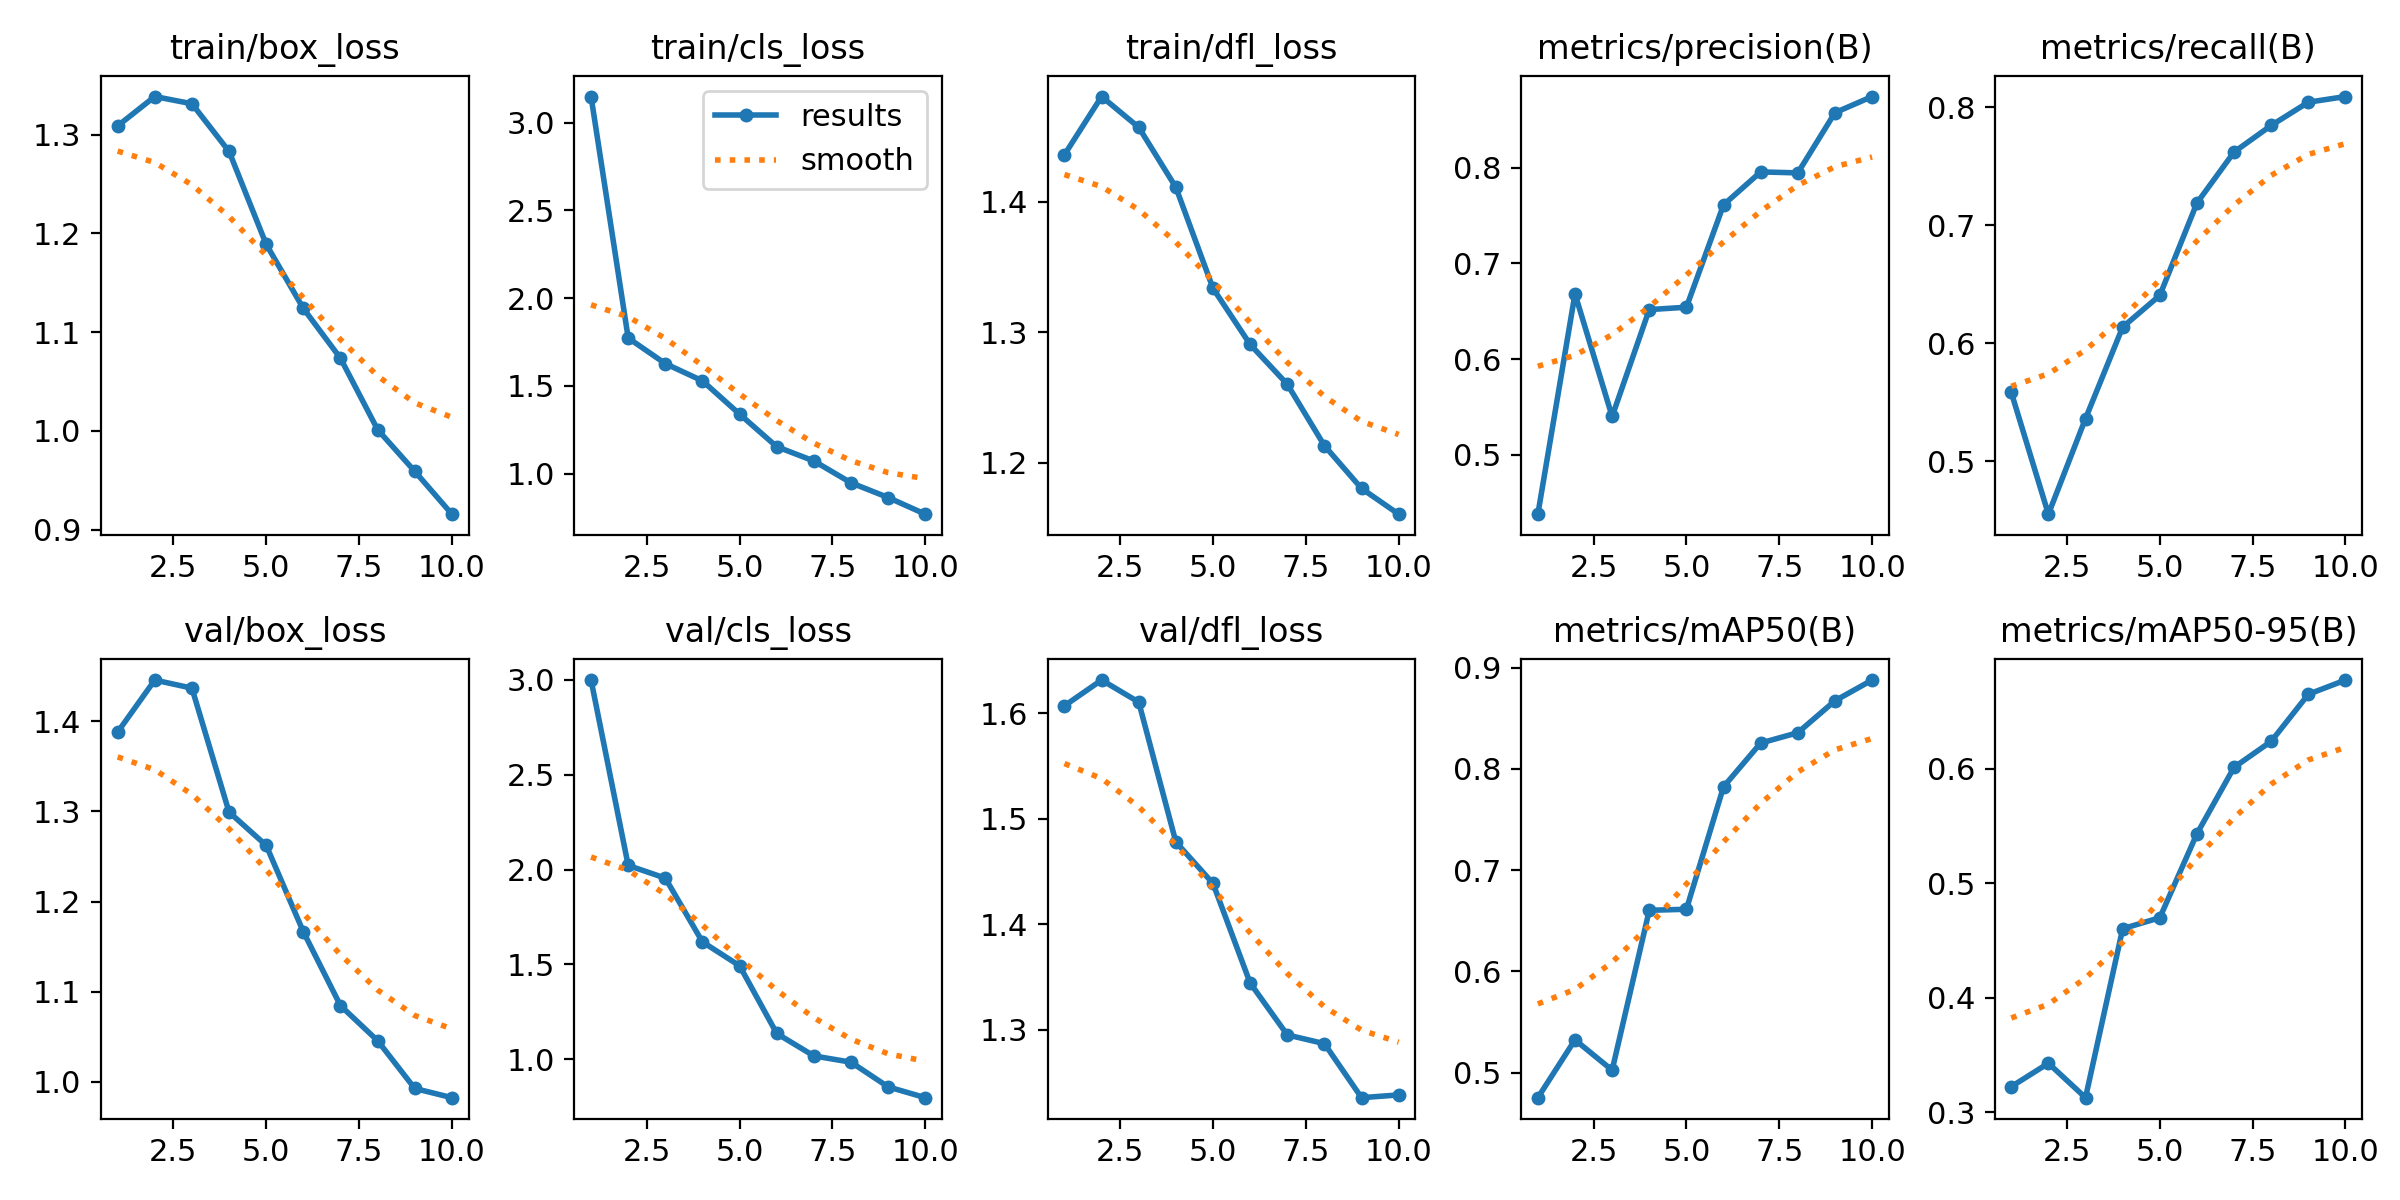

In [32]:
Image(filename='runs/detect/train6/results.png', width=800)

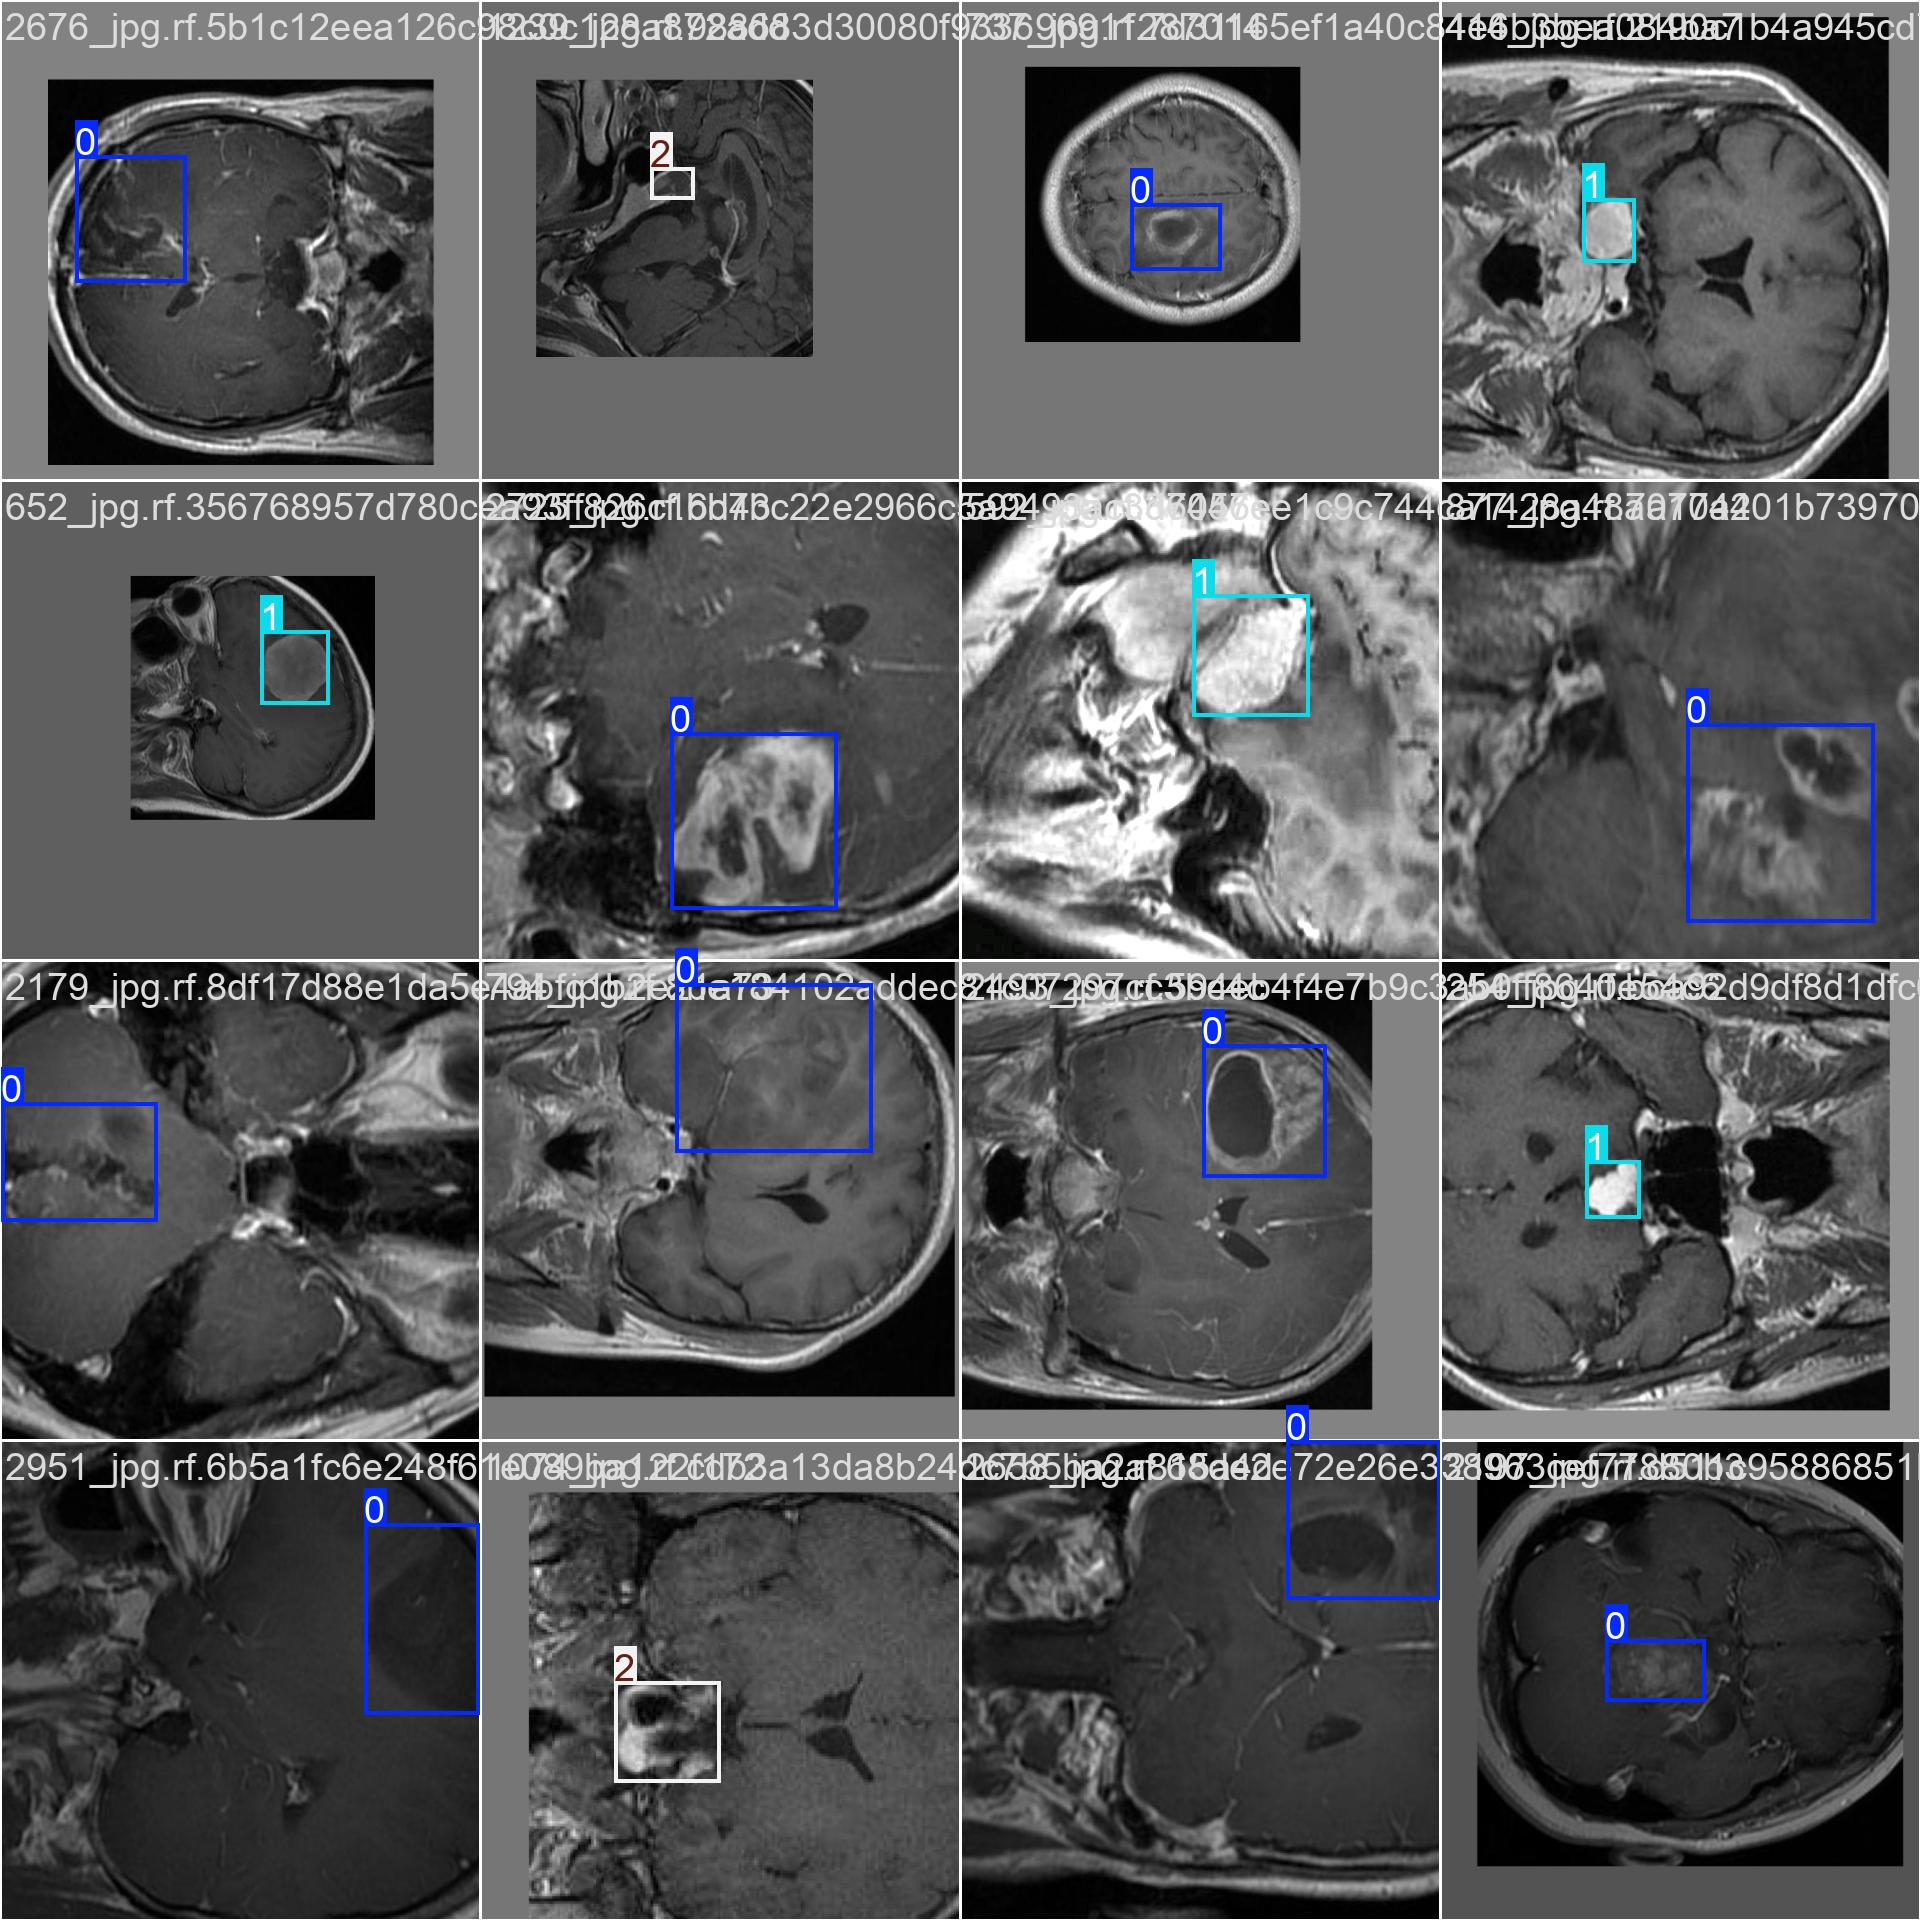

In [29]:
Image(filename='runs/detect/train6/train_batch2.jpg', width=800)

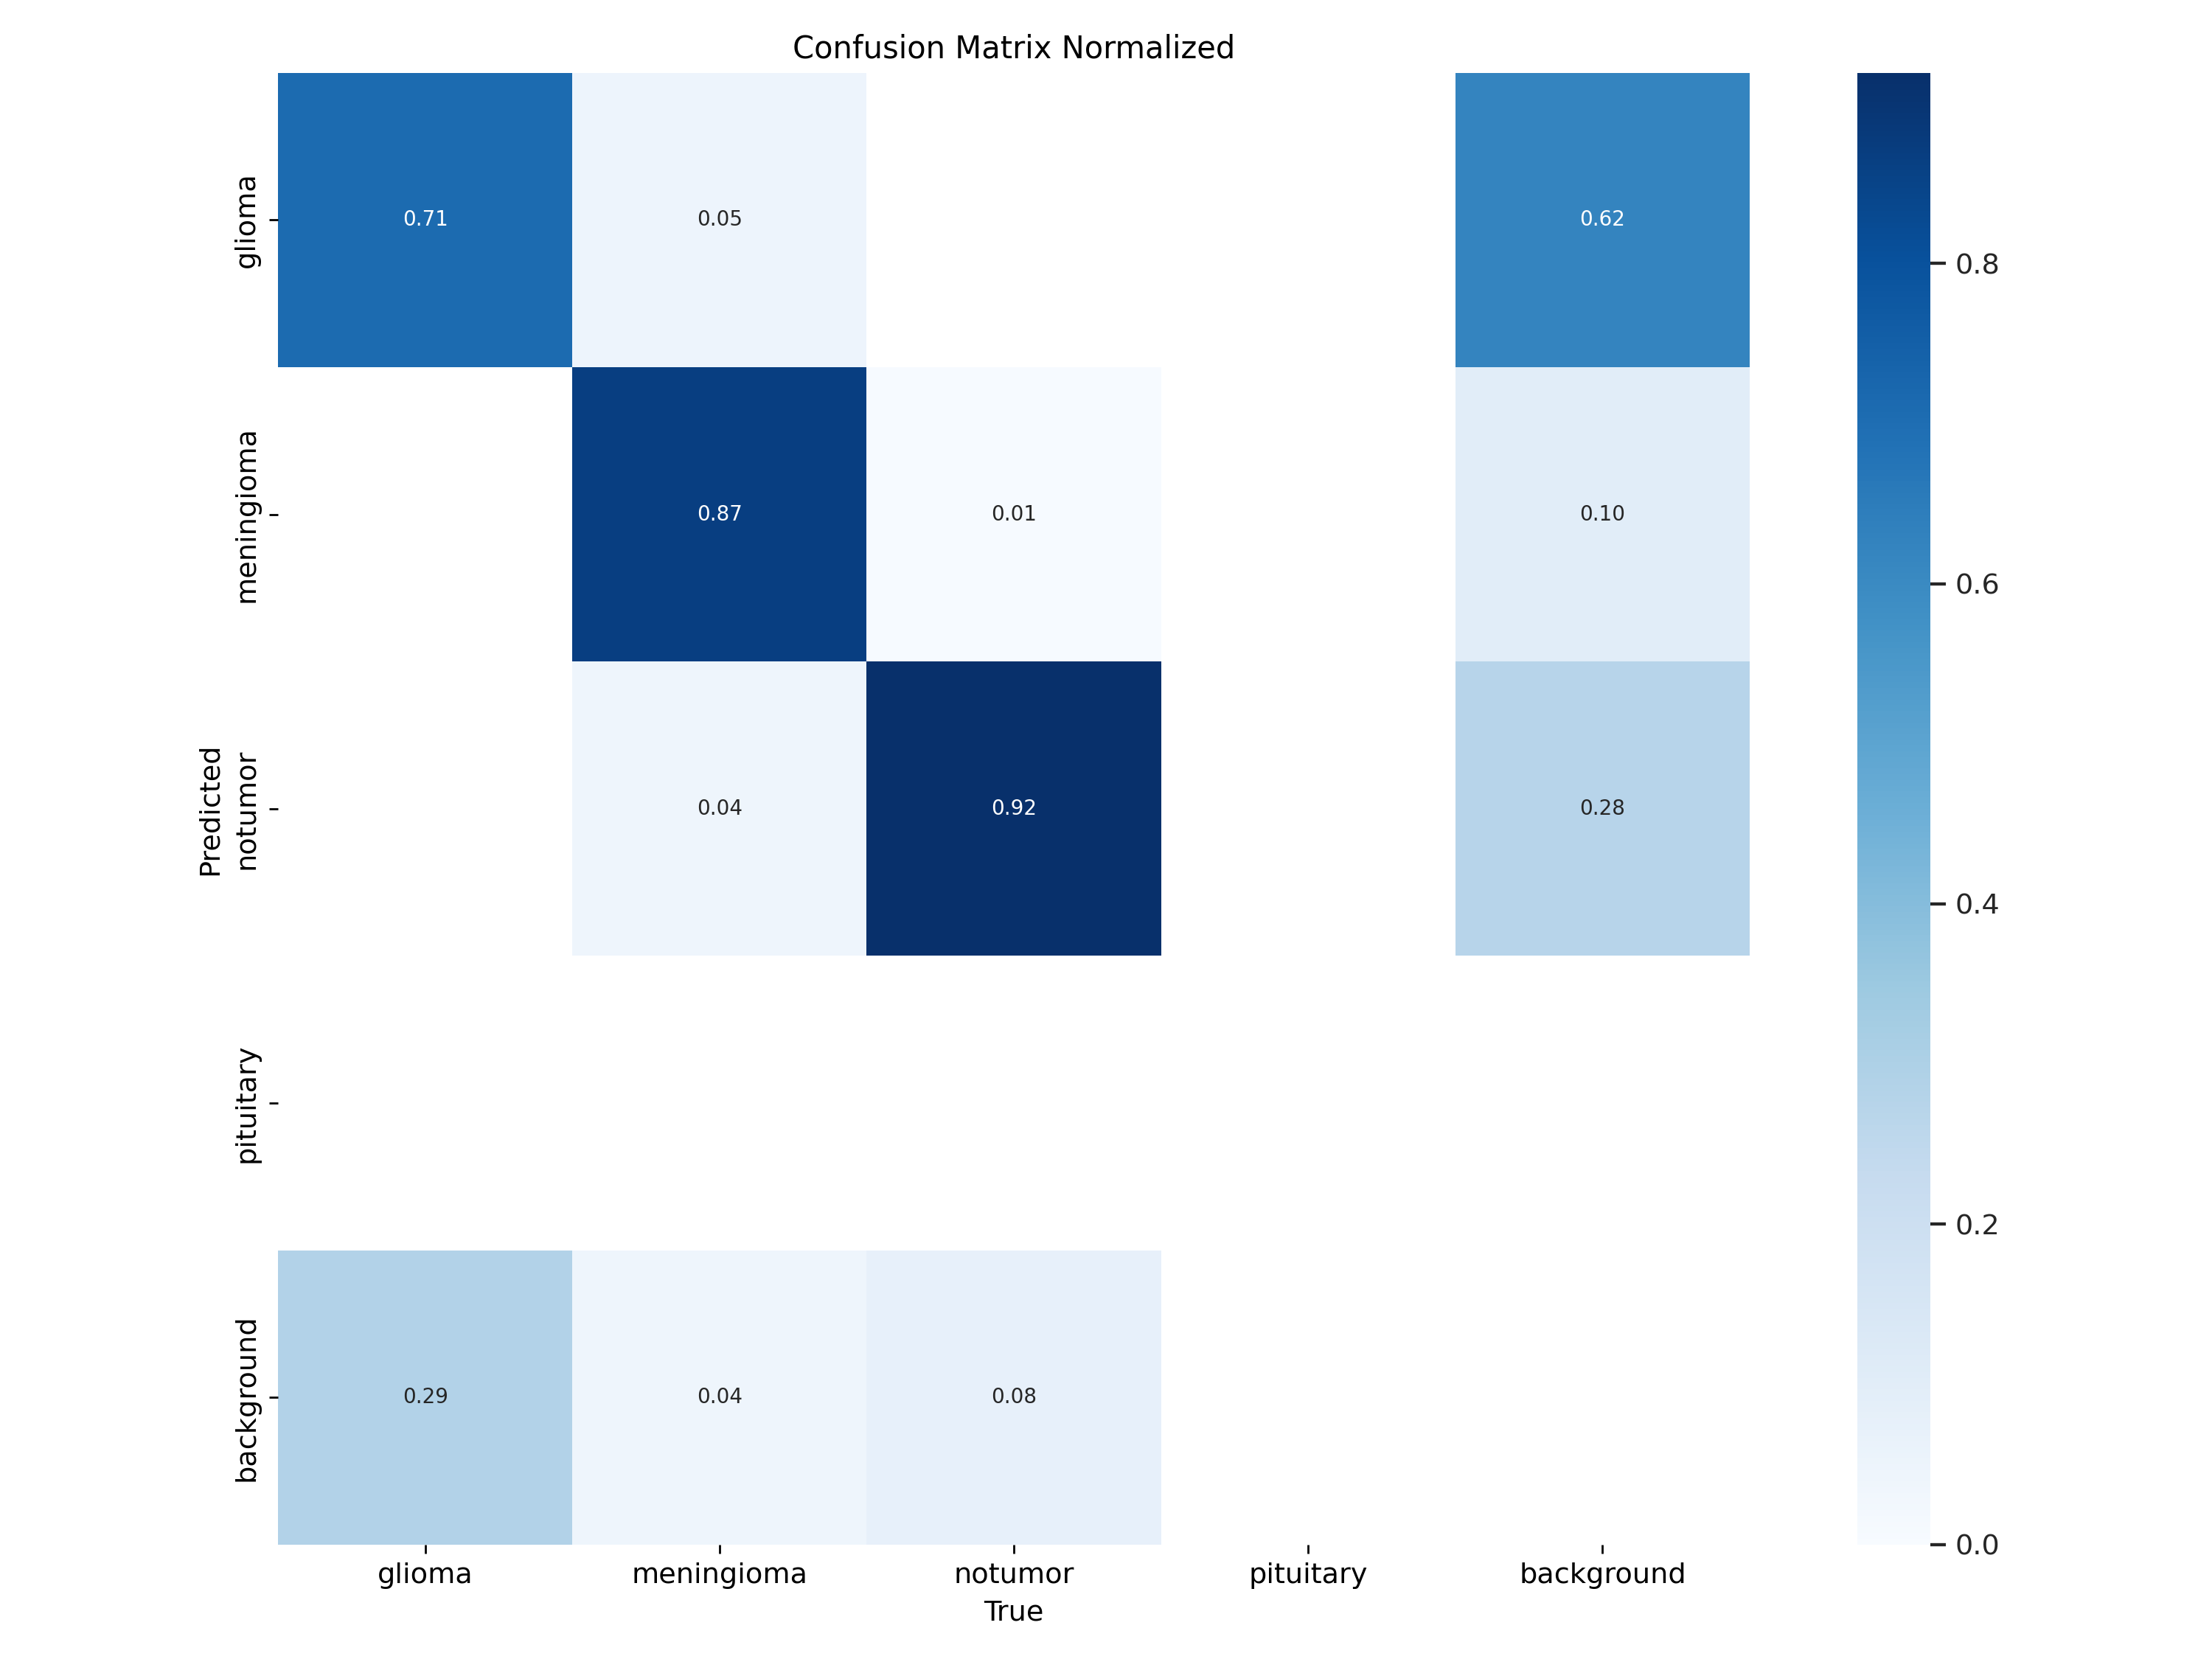

In [28]:
Image(filename='runs/detect/train6/confusion_matrix_normalized.png', width=800)

# **Model Validation**

In [43]:
!yolo task=detect mode=val model=runs/detect/train6/weights/best.pt data=data.yaml

/usr/local/lib/python3.11/dist-packages/ultralytics/nn/tasks.py:781: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of the loaded file. Please open an issue on GitHub for any issues related to this experimental feature.
  ckpt = torch.load(file, map_location="cpu")
Ultralytics YO

In [44]:
!ls runs/detect/val

confusion_matrix_normalized.png  P_curve.png   val_batch0_labels.jpg  val_batch1_pred.jpg
confusion_matrix.png		 PR_curve.png  val_batch0_pred.jpg    val_batch2_labels.jpg
F1_curve.png			 R_curve.png   val_batch1_labels.jpg  val_batch2_pred.jpg


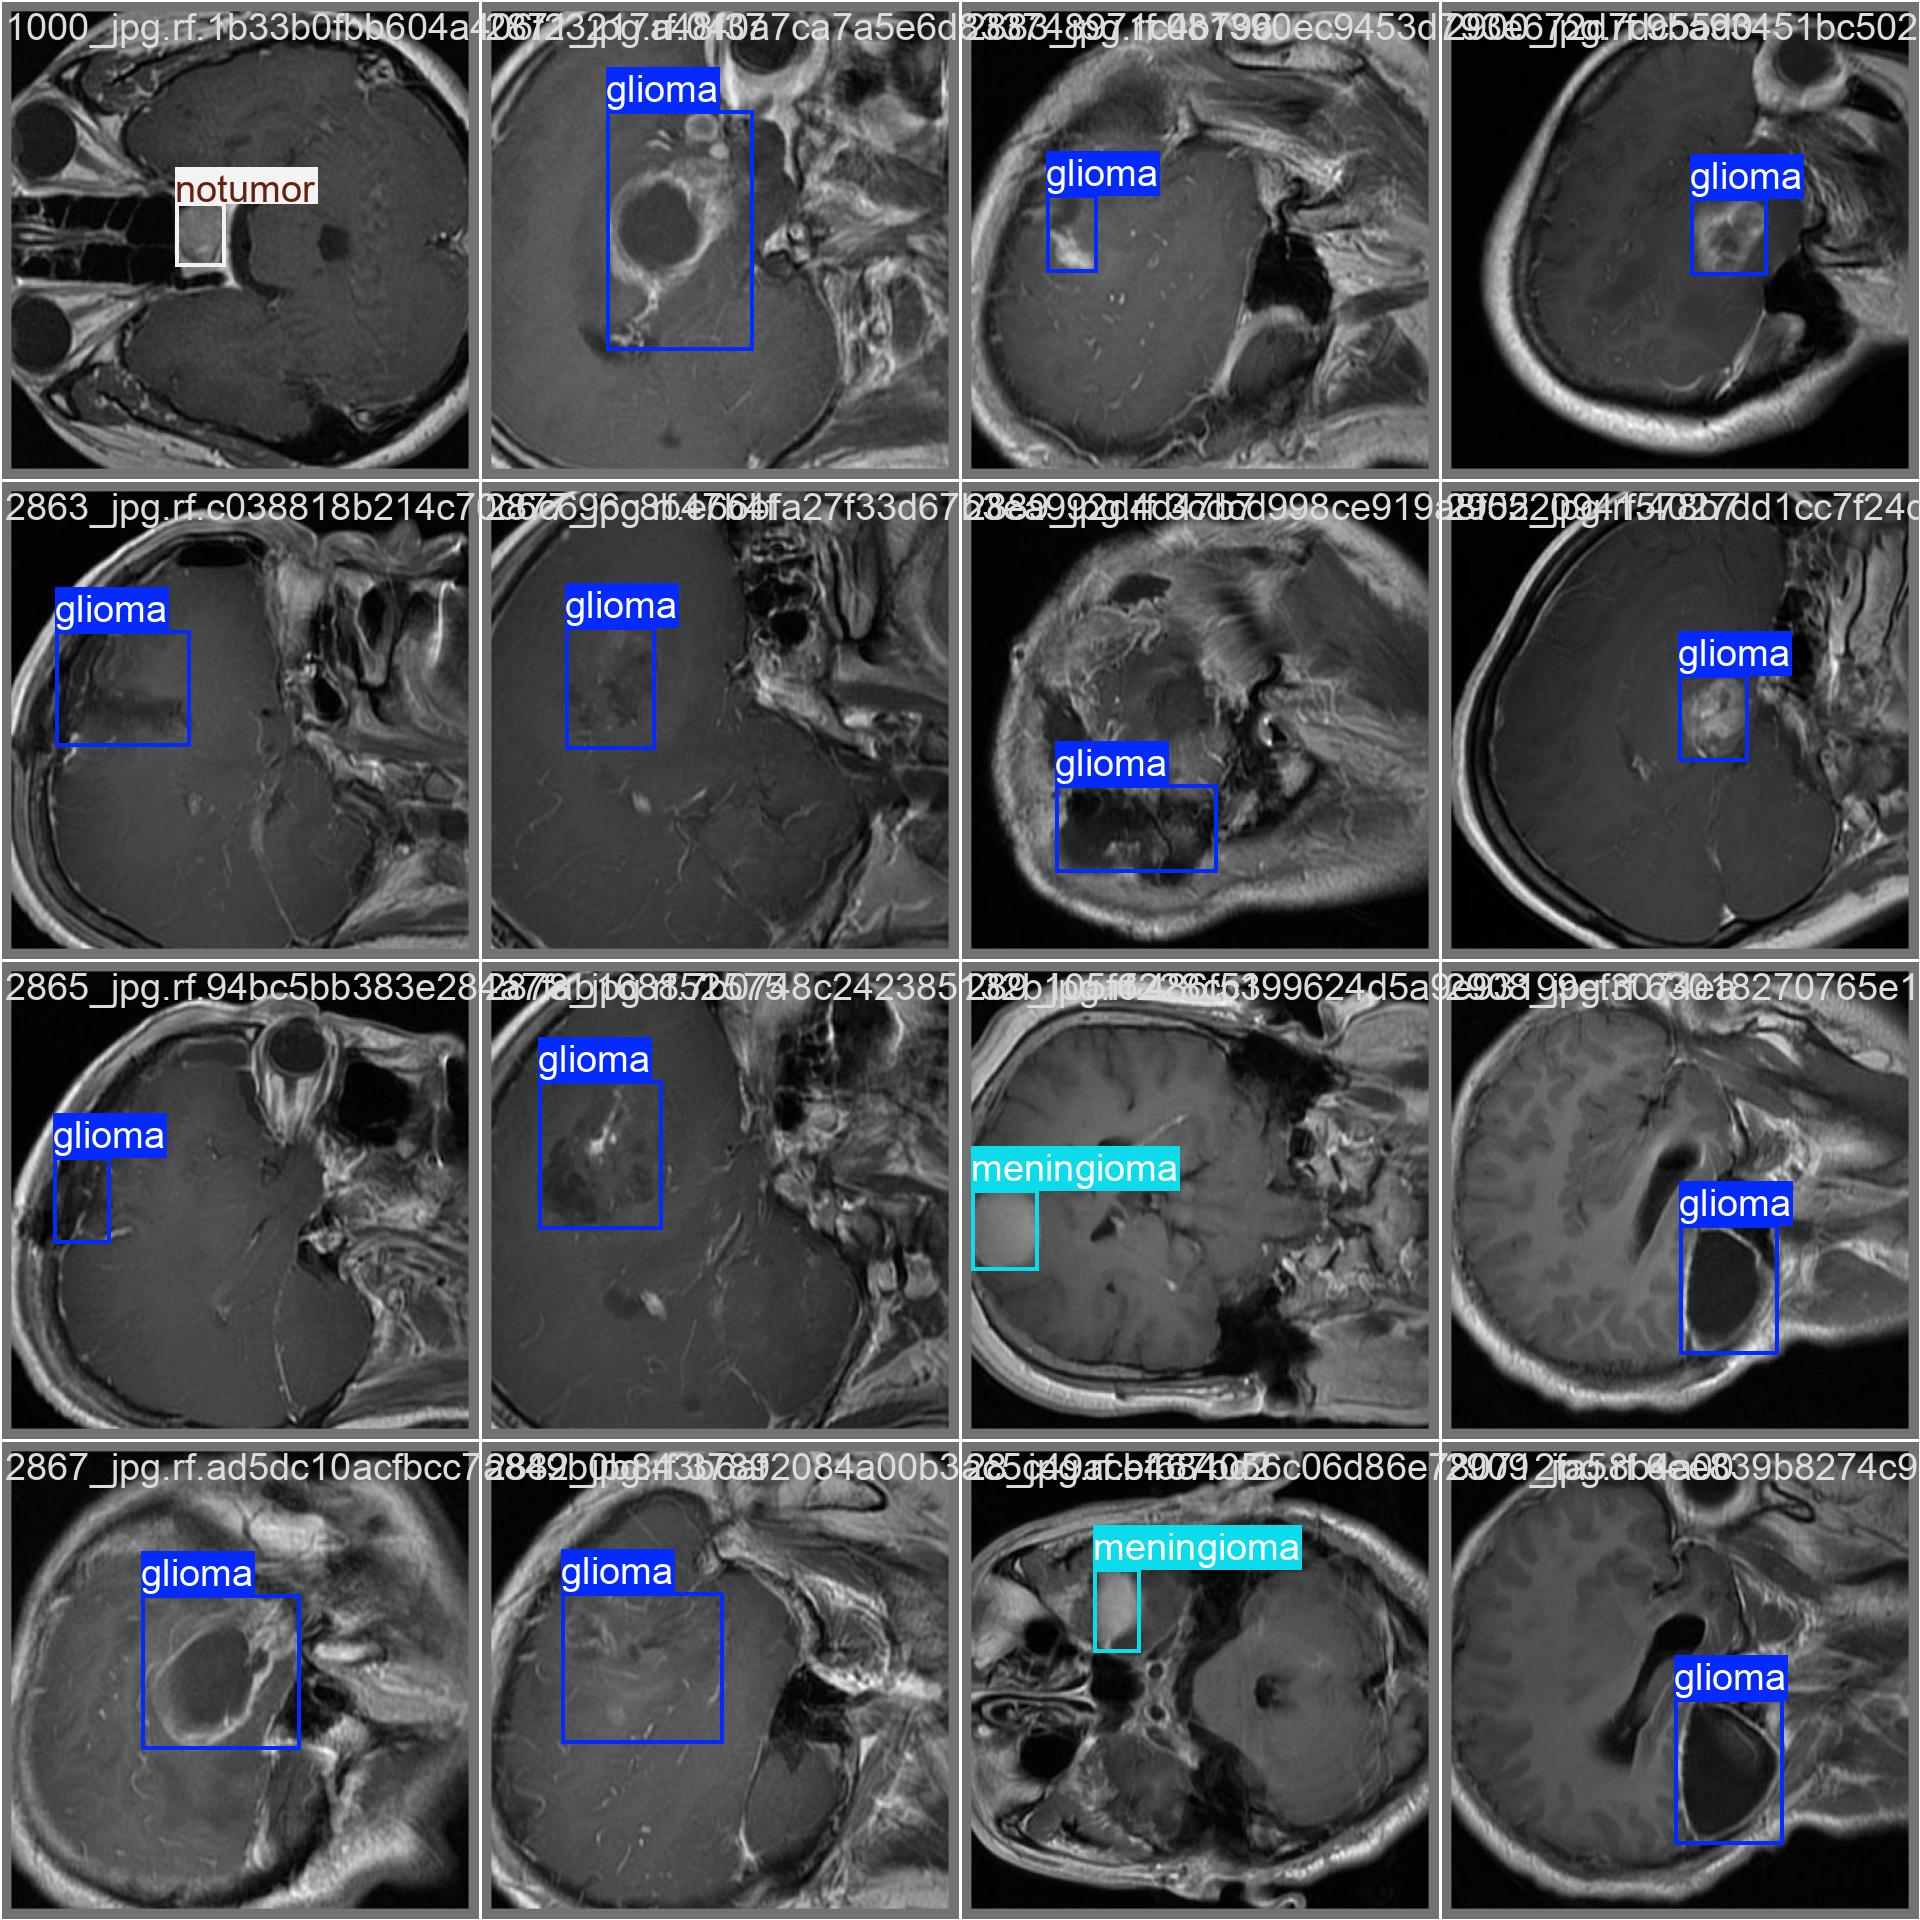

In [50]:
Image(filename='runs/detect/val/val_batch0_labels.jpg', width=1000)

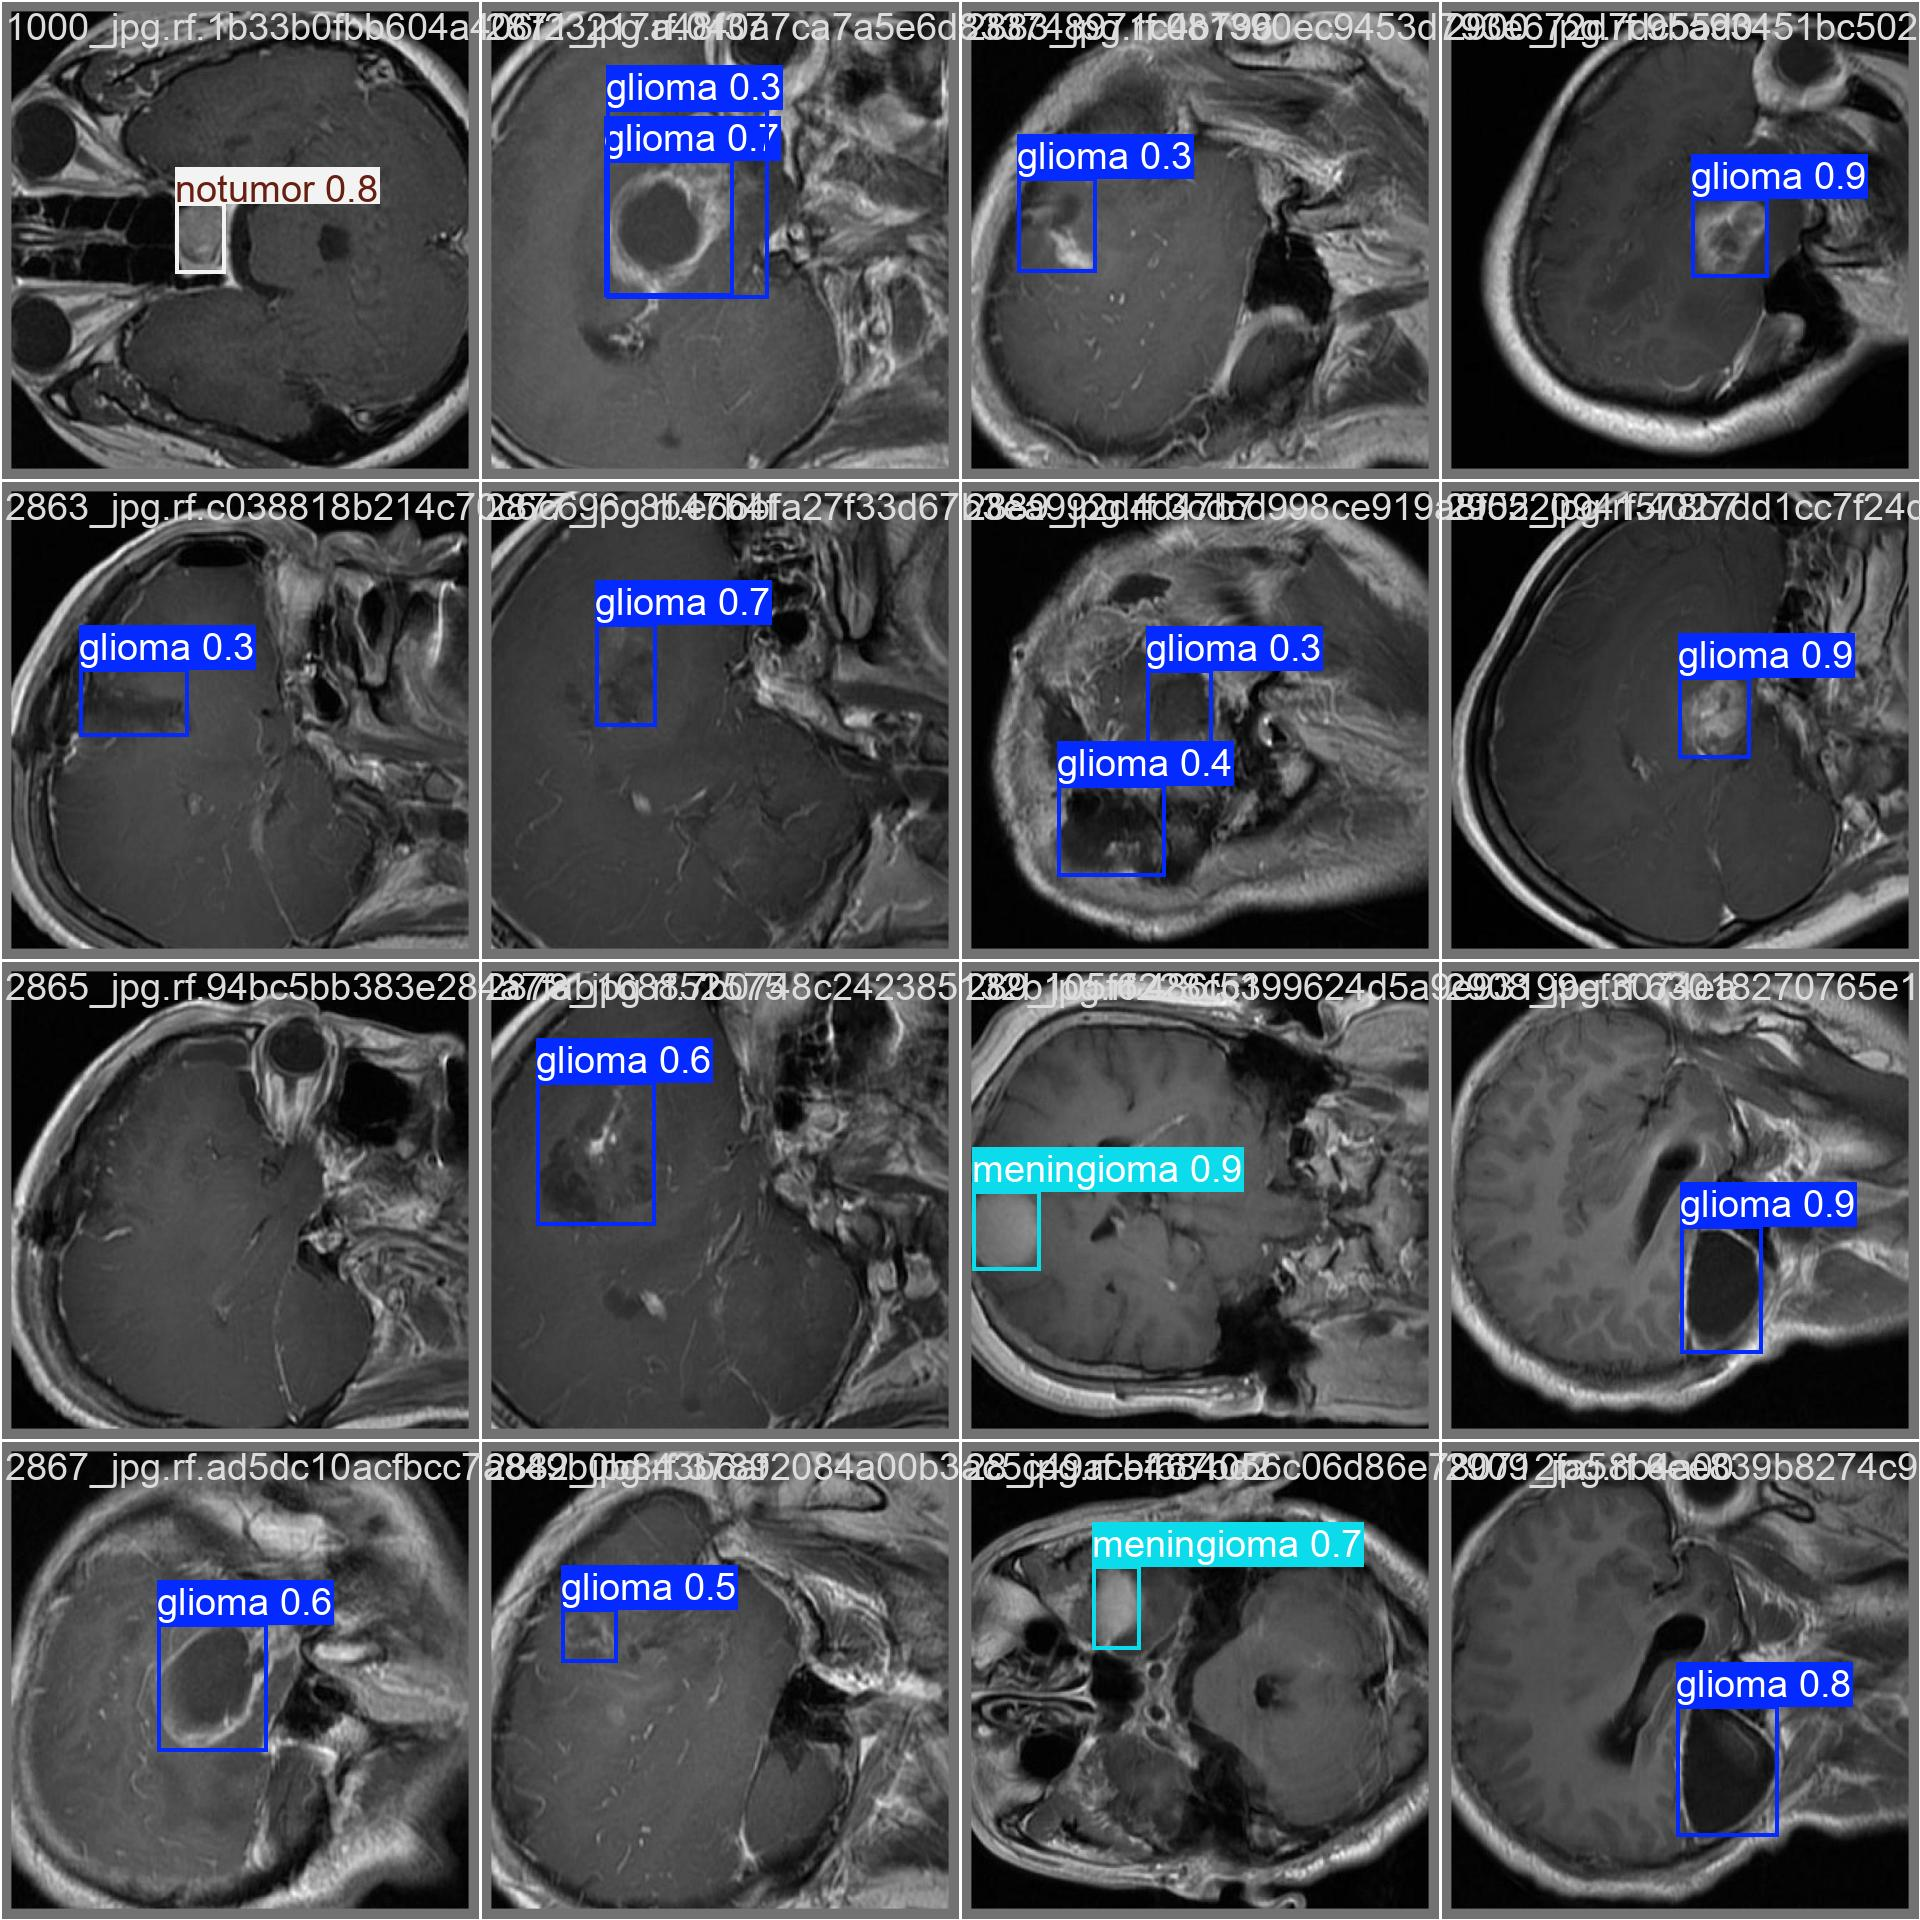

In [52]:
Image(filename='runs/detect/val/val_batch0_pred.jpg', width=1000)

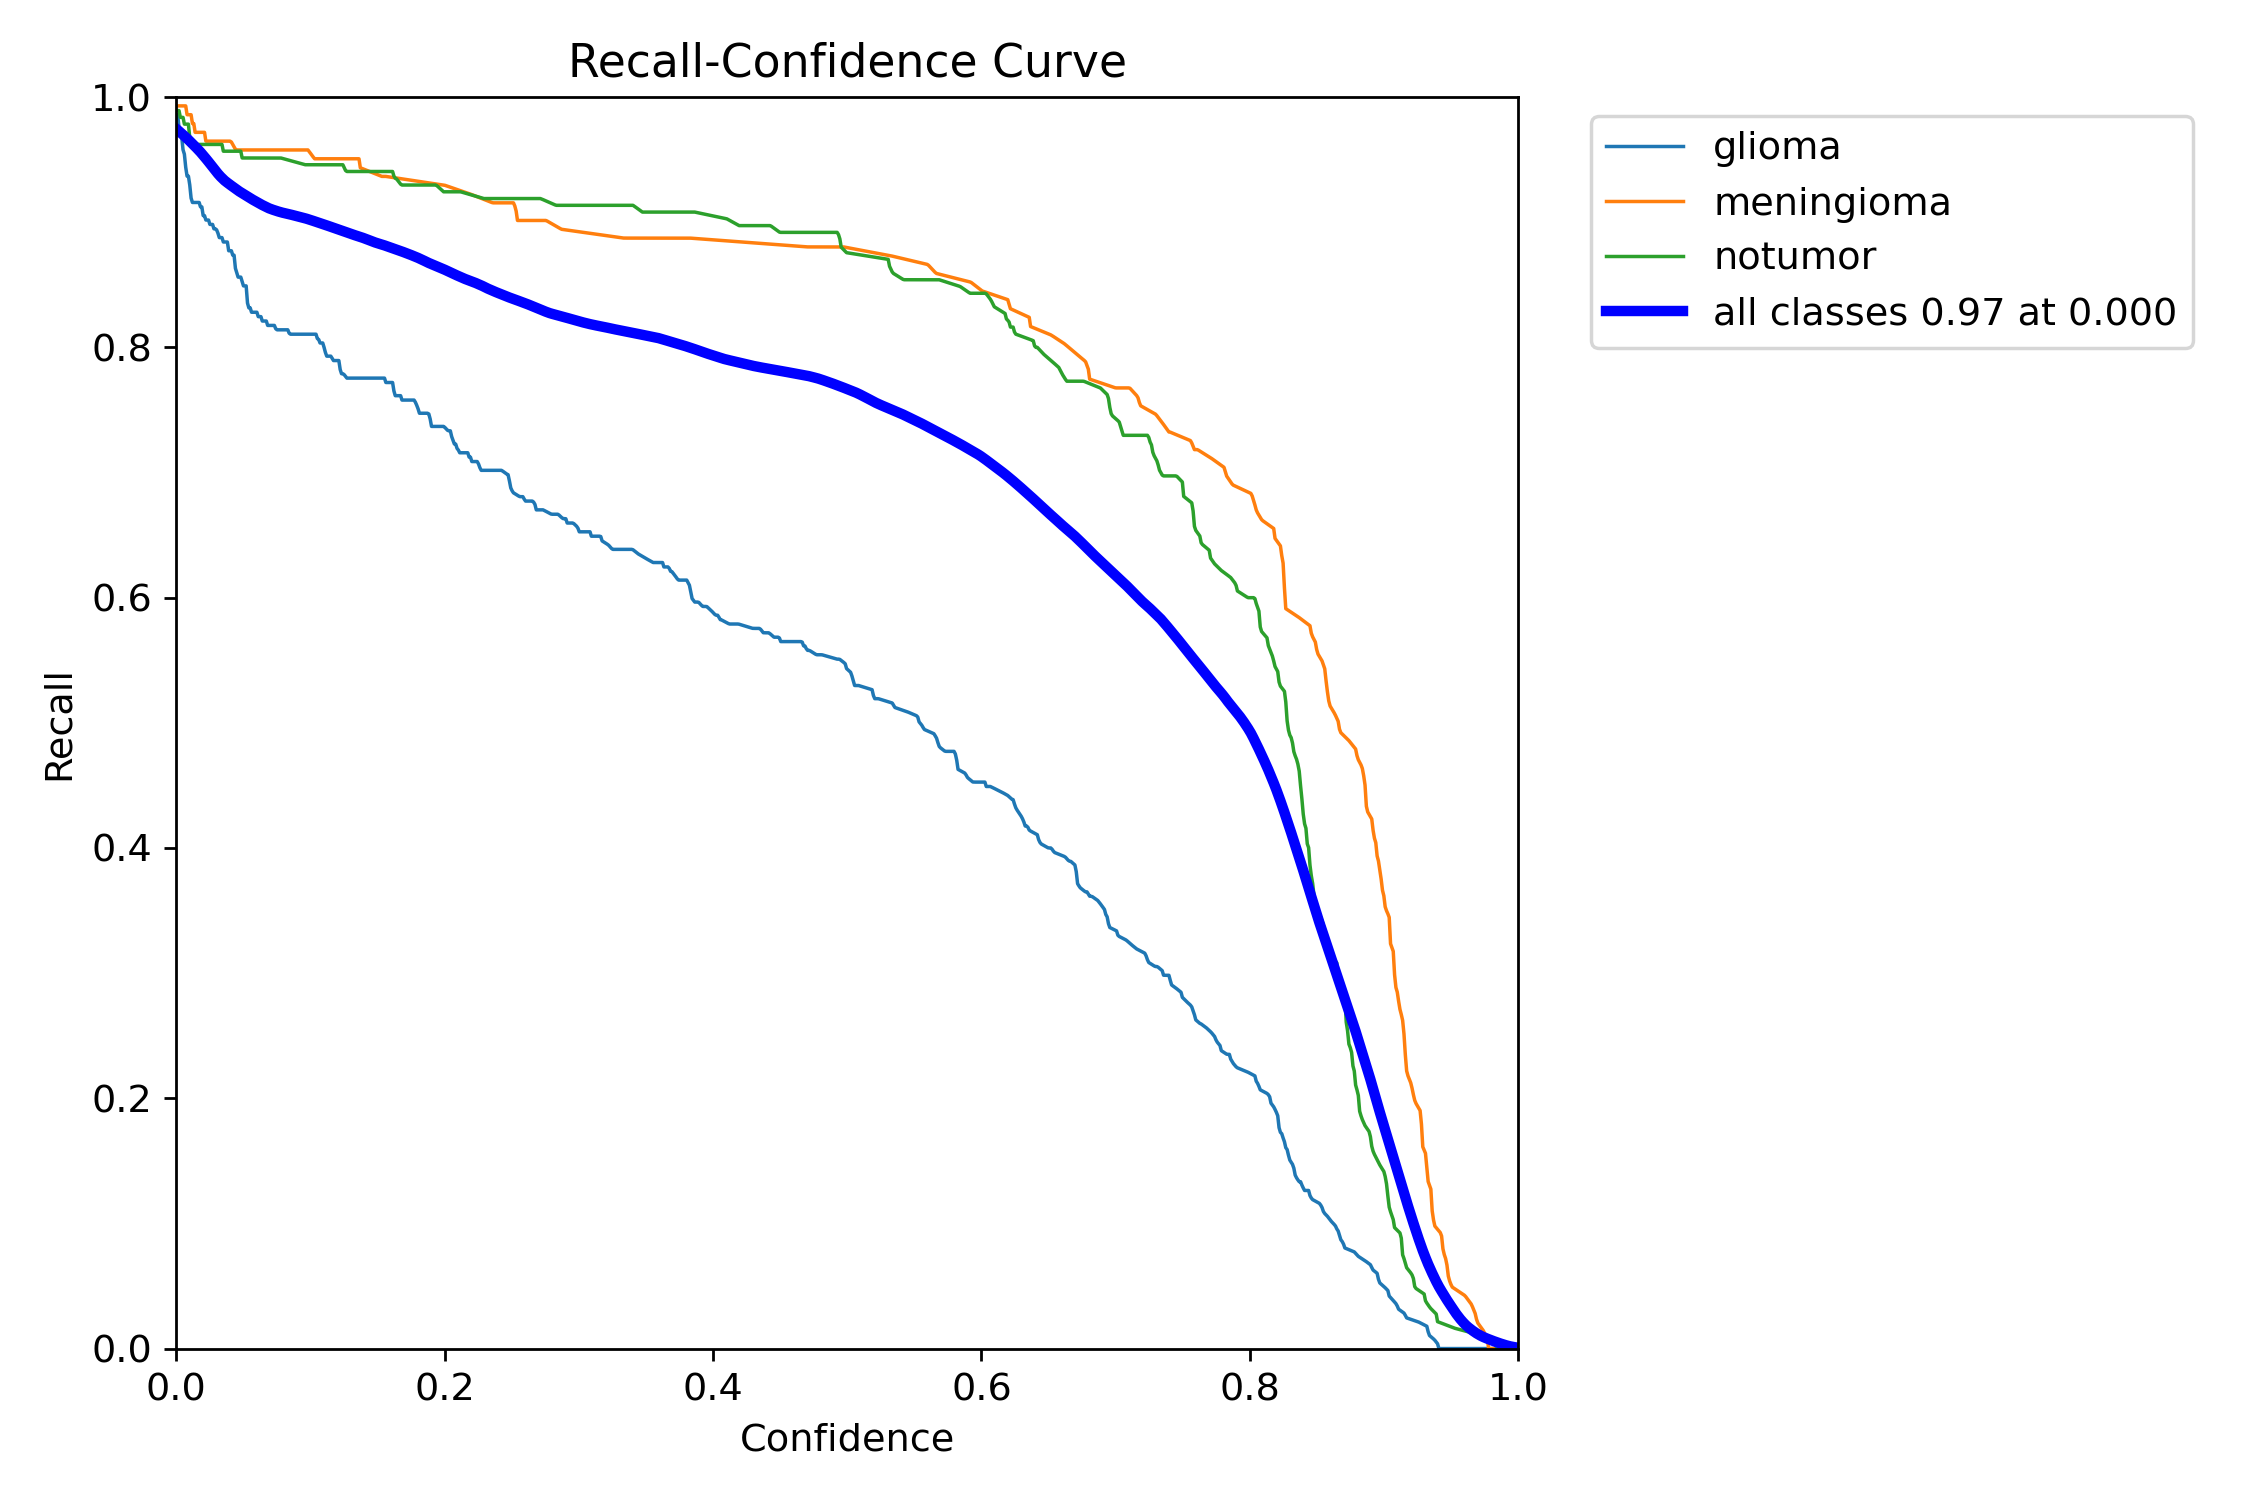

In [49]:
Image(filename='runs/detect/val/R_curve.png', width=1000)

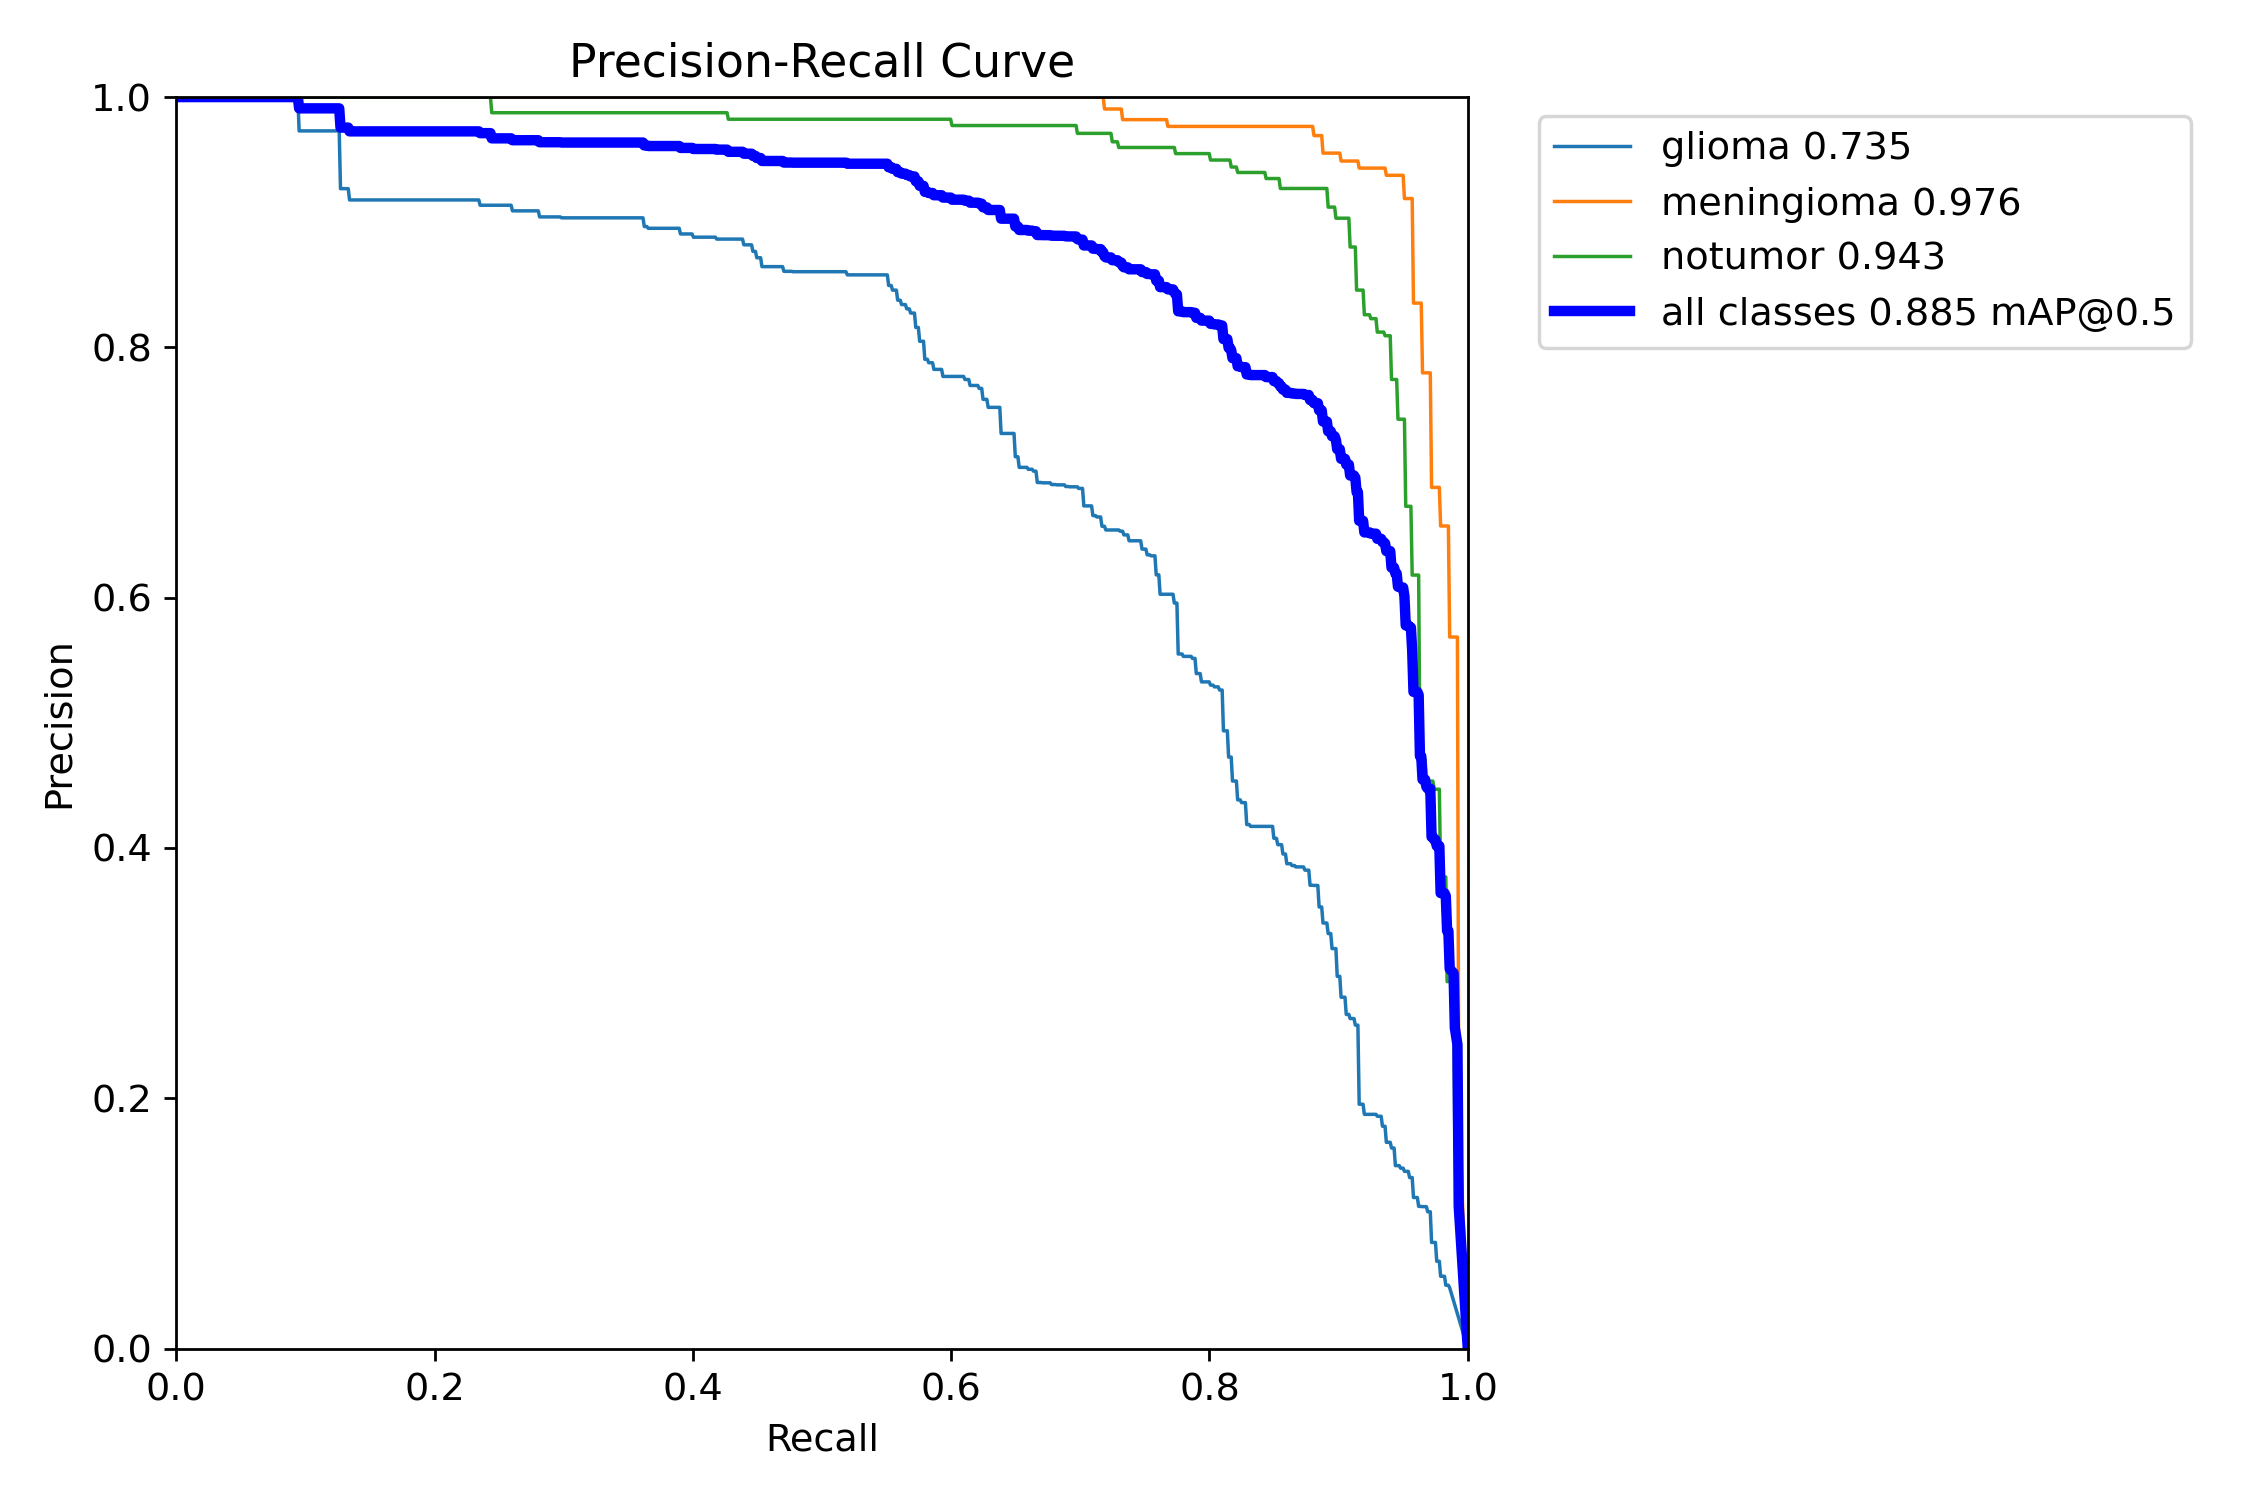

In [48]:
Image(filename='runs/detect/val/PR_curve.png', width=1000)

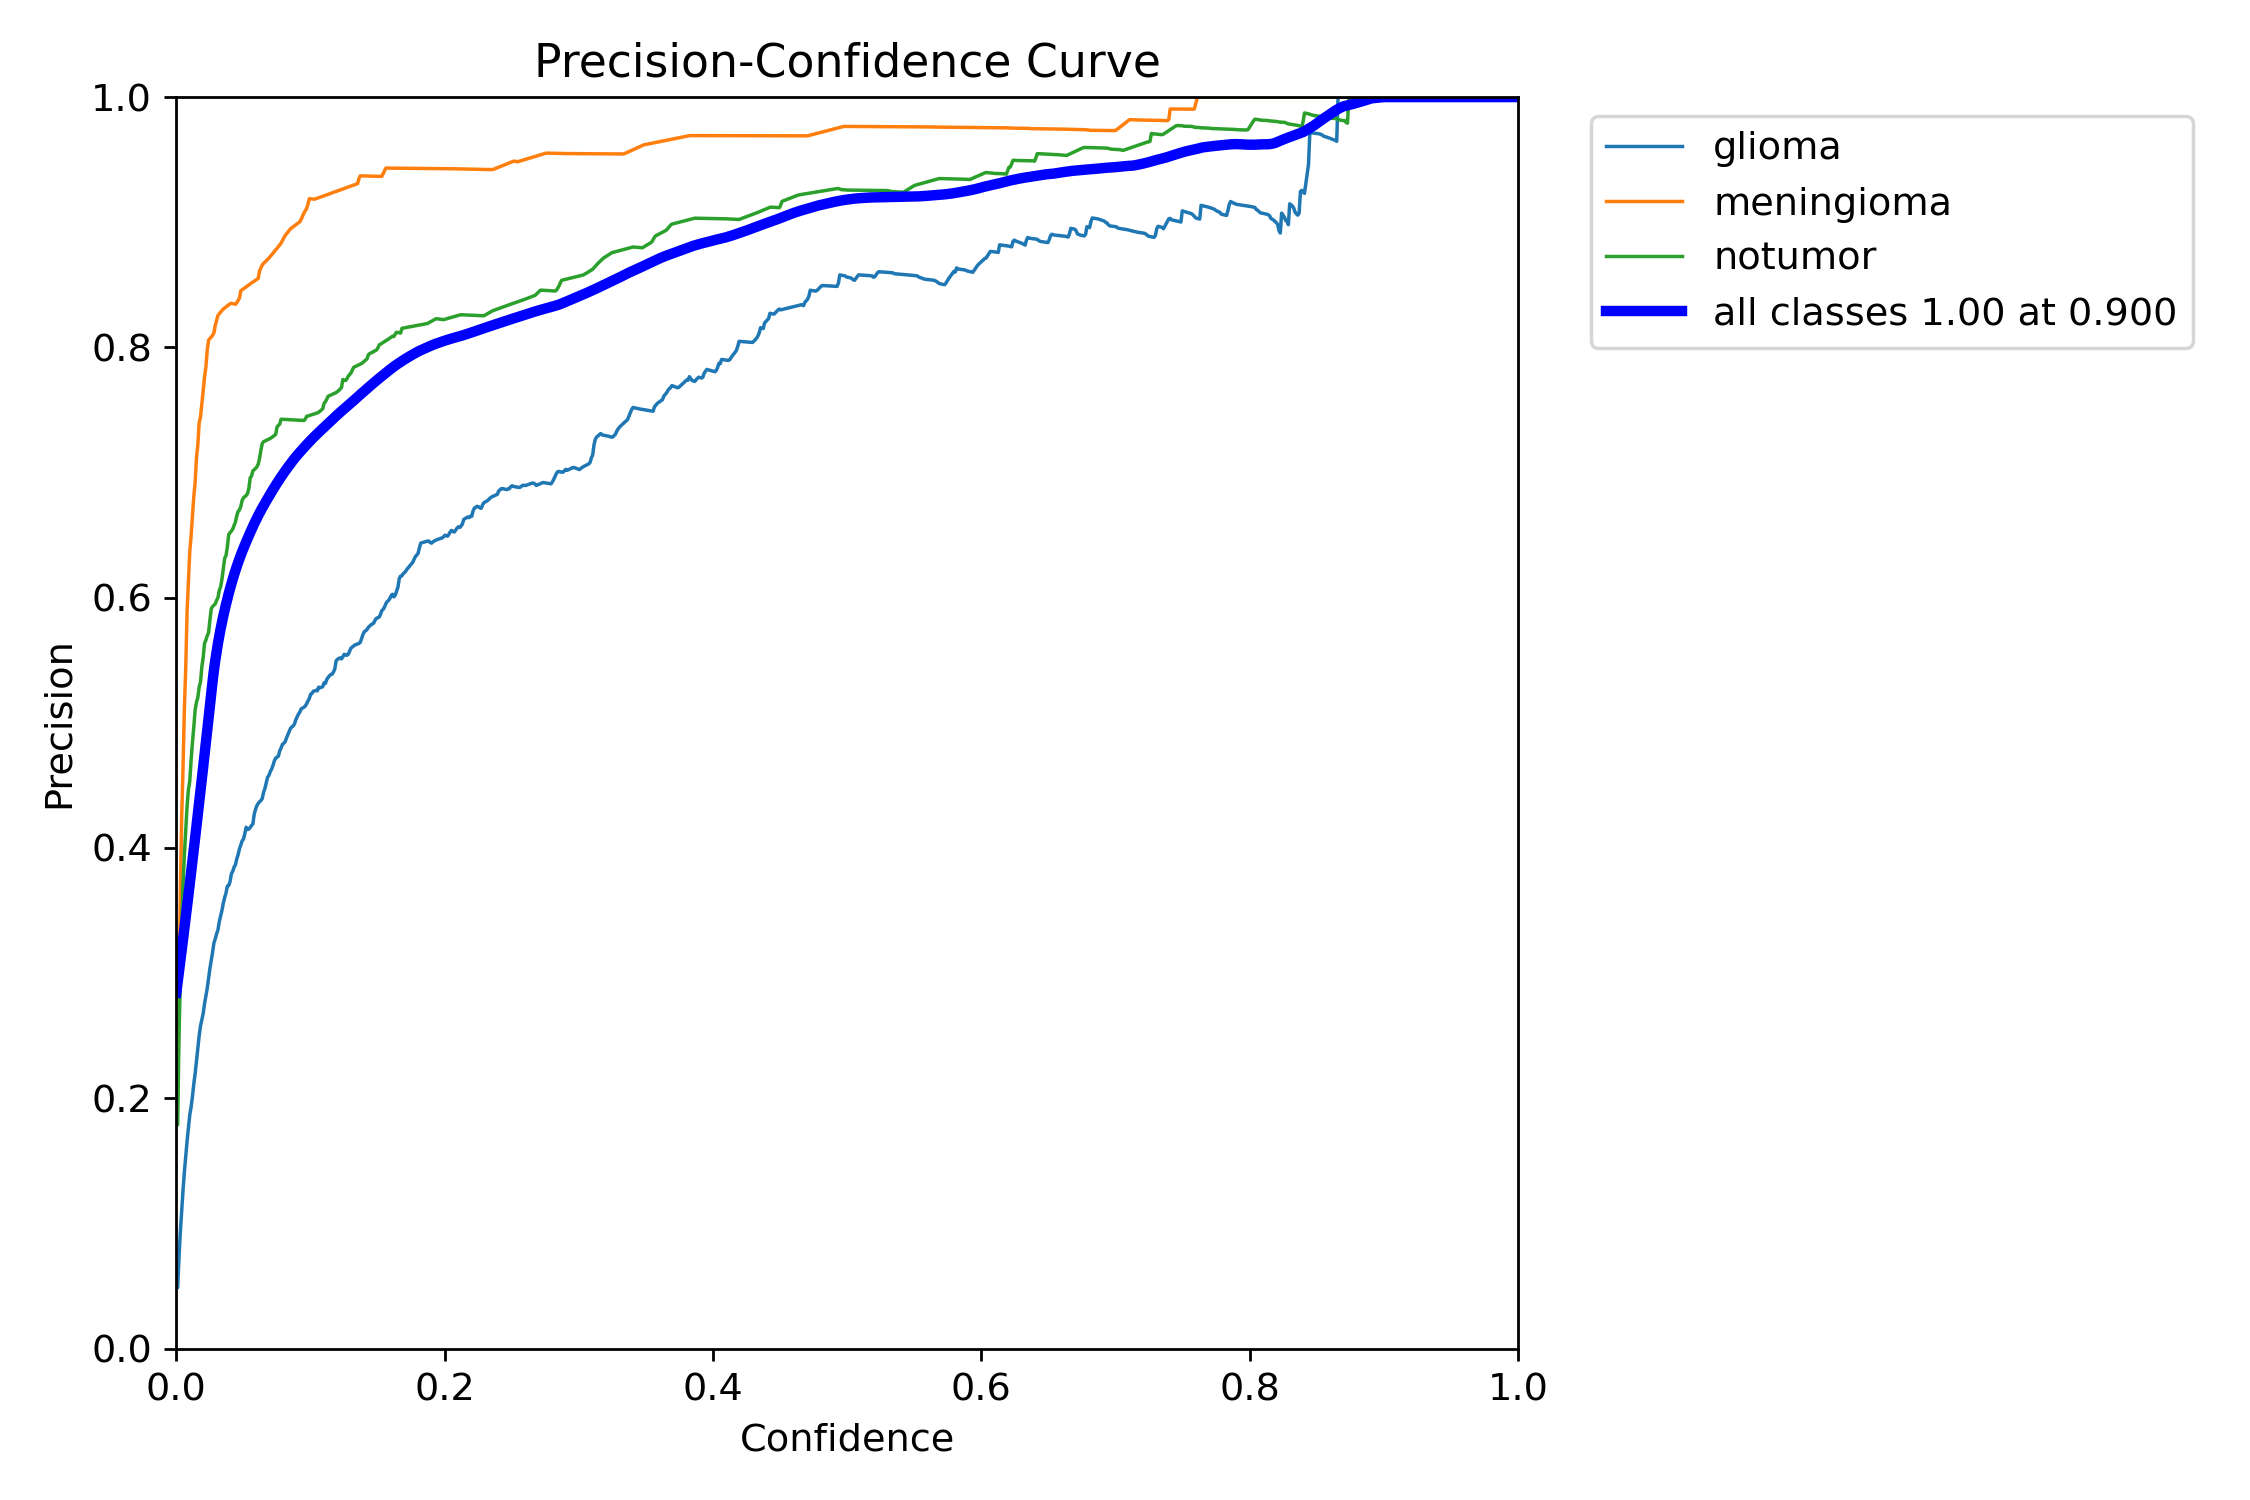

In [47]:
Image(filename='runs/detect/val/P_curve.png', width=1000)

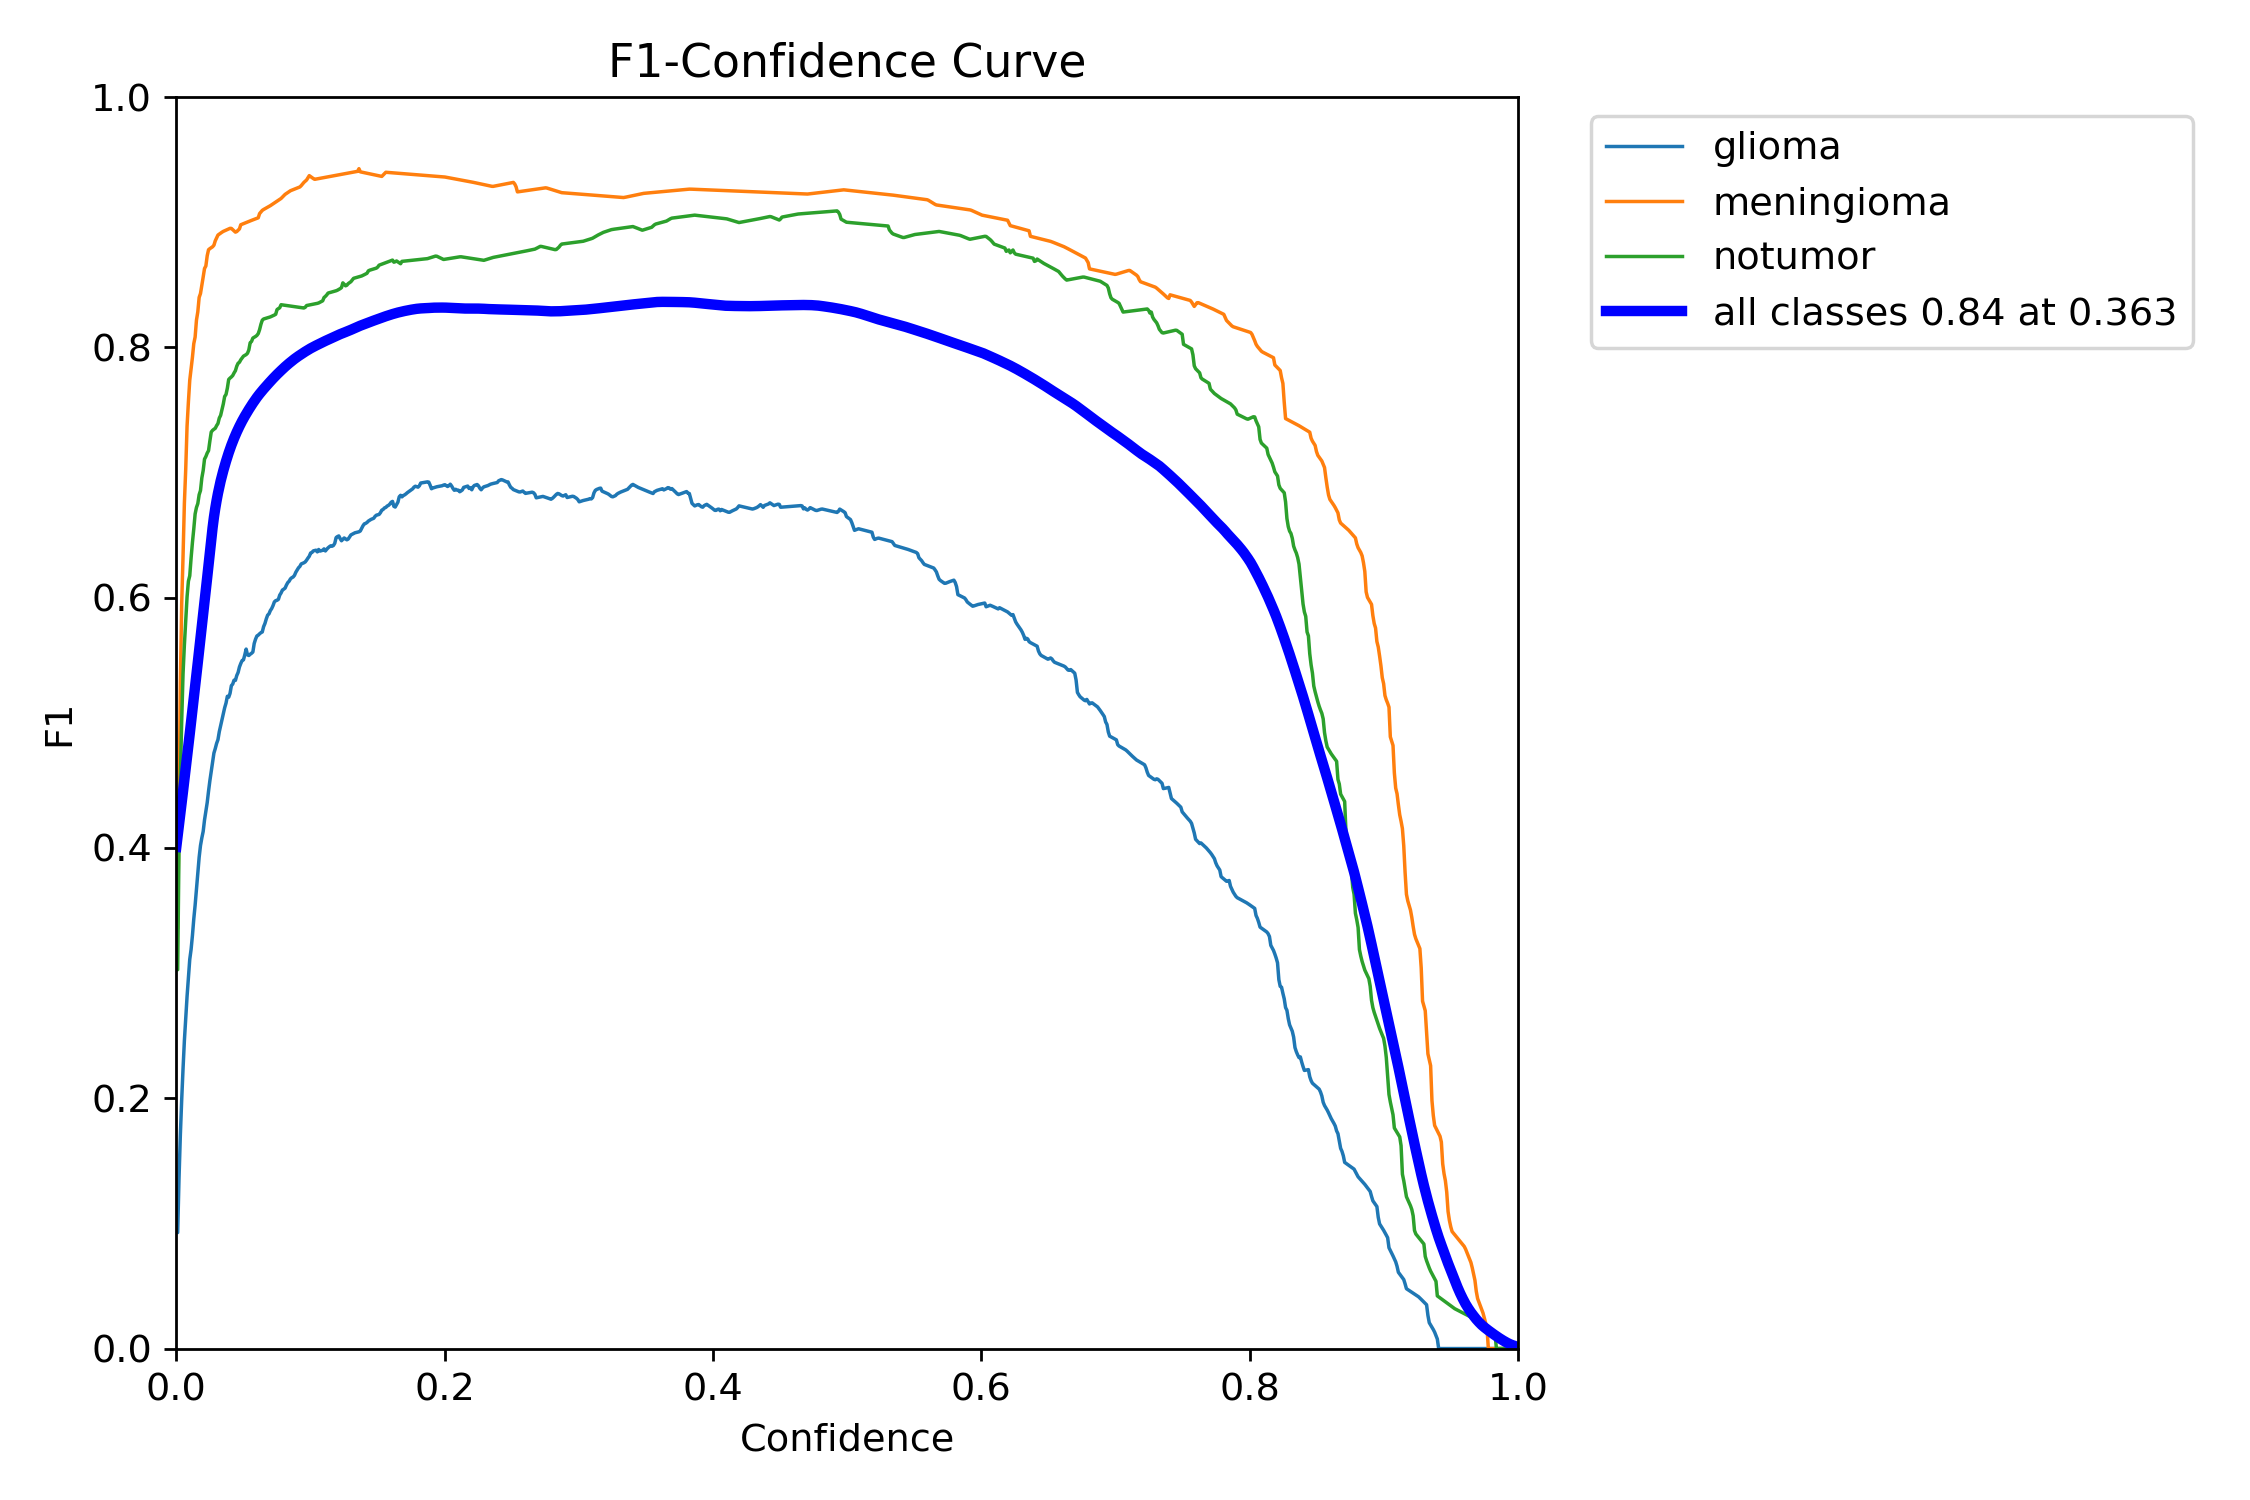

In [46]:
Image(filename='runs/detect/val/F1_curve.png', width=1000)

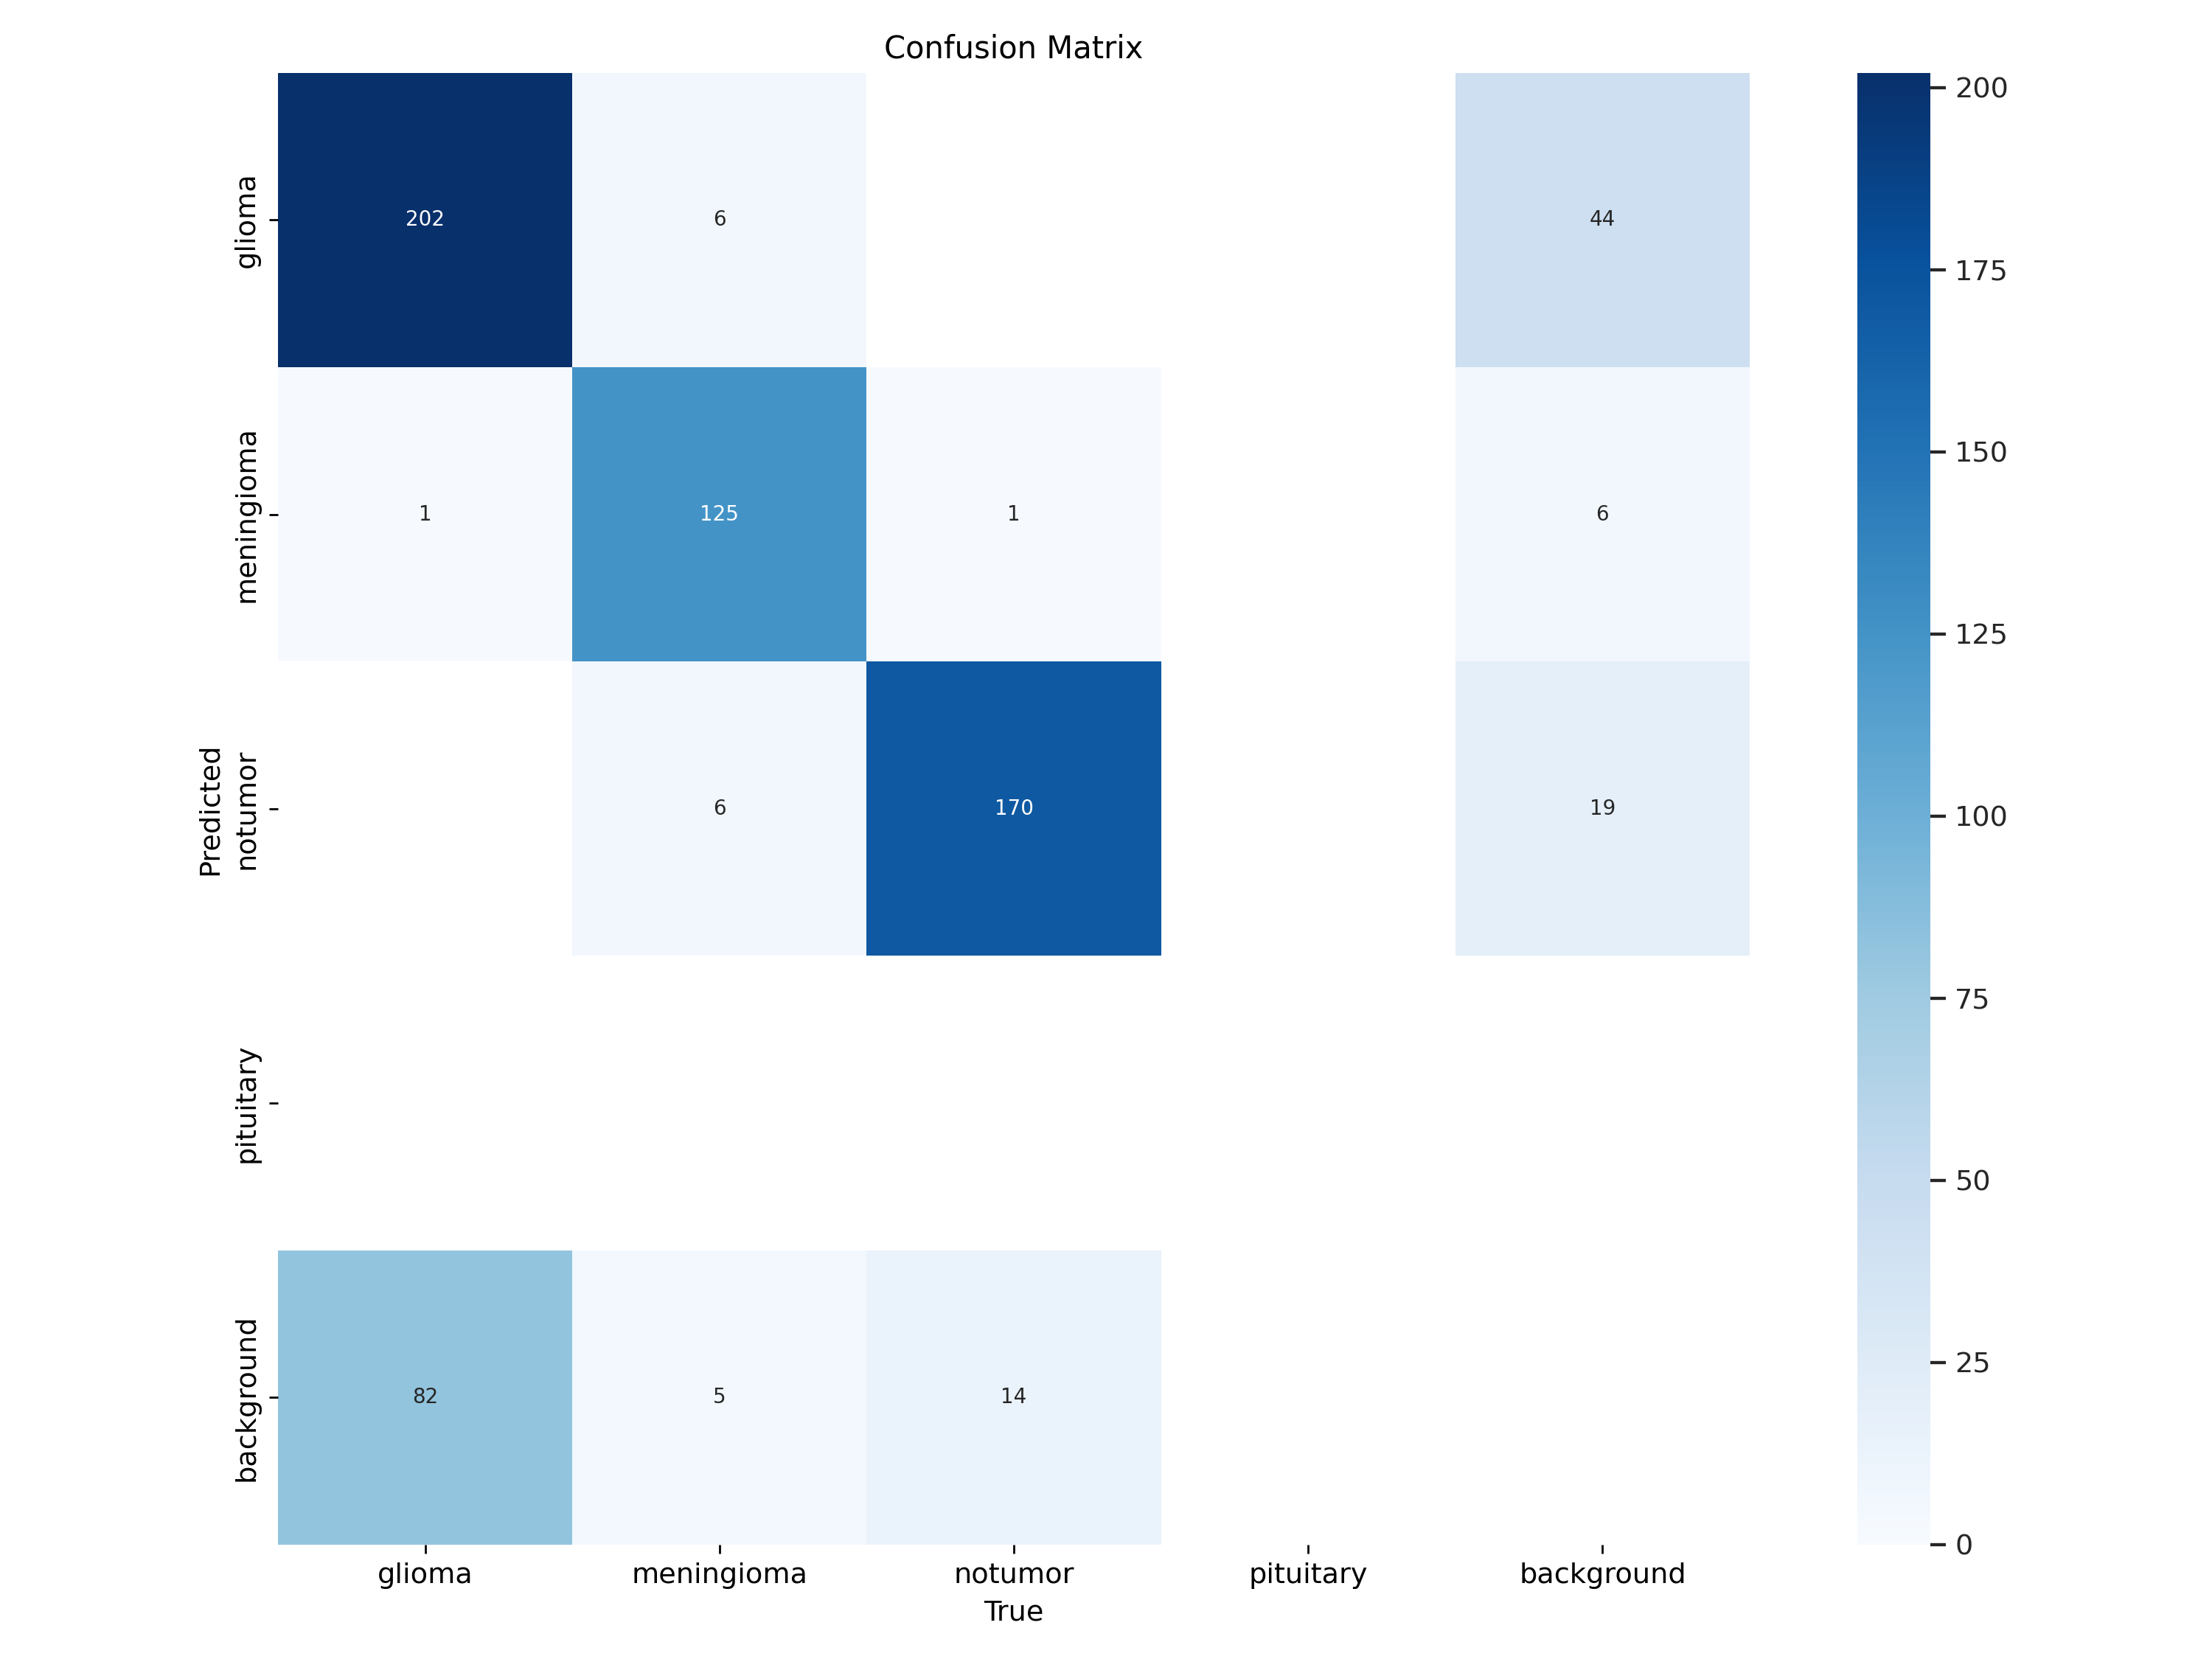

In [45]:
Image(filename='runs/detect/val/confusion_matrix.png', width=1000)